In [129]:
pip install squarify

In [130]:
# importing importing libraries

import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import datetime as dt


In [131]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Exploratory Data Analysis

The dataset consist of **eight** tables in separate .csv files, we will utilize only seven of them. The dataset covers a two year span purchase transactions of **2500** **households**. Also demographics information of households, campaign and coupon redemption informations are available.

1. **Campaign Descriptions** (_campaign_desc.csv_)
2. **Campaigns** (_campaign_table.csv_)
3. **Coupons** (_coupon.csv_)
4. **Coupon Redemptions** (_coupon_redempt.csv_)
5. **Transactions** (_transaction_data.csv_)
6. **Demographics** (_hh_demographic.csv_)
7. **Product** (_product.csv_)

### Importing Data

In [132]:
import pandas as pd
df_campaign_description=pd.read_csv('/content/drive/MyDrive/dunnhumby data det/campaign_desc.csv')
df_campaign_table=pd.read_csv('/content/drive/MyDrive/dunnhumby data det/campaign_table.csv')
df_coupon=pd.read_csv('/content/drive/MyDrive/dunnhumby data det/coupon.csv')
df_coupon_redemption=pd.read_csv('/content/drive/MyDrive/dunnhumby data det/coupon_redempt.csv')
df_demographic=pd.read_csv('/content/drive/MyDrive/dunnhumby data det/hh_demographic.csv')
df_product=pd.read_csv('/content/drive/MyDrive/dunnhumby data det/product.csv')
df_transaction=pd.read_csv('/content/drive/MyDrive/dunnhumby data det/transaction_data.csv')

###Campaign Description 


Campaign description table is a look up table ,containing the start and the end days of each campaign (30 campaigns in total).Also it gives which campaign belongs to what category (Type A, B and C).


In [133]:
# Campaign information 
df_campaign_description.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [134]:
#Shape of campaign description data
print('Shape of the data')
df_campaign_description.shape

Shape of the data


(30, 4)

In [135]:
#To check if there are any duplicated data  
# df_campaign_description.duplicated().sum()
print('Number of duplicated data: ', df_campaign_description.duplicated().sum())

Number of duplicated data:  0


In [136]:
print('Number of Nulls in data')
df_campaign_description.isnull().sum()

Number of Nulls in data


DESCRIPTION    0
CAMPAIGN       0
START_DAY      0
END_DAY        0
dtype: int64

In [137]:
print('Datatype of each column')
df_campaign_description.dtypes

Datatype of each column


DESCRIPTION    object
CAMPAIGN        int64
START_DAY       int64
END_DAY         int64
dtype: object

**calculating and visualising how long each campaign lasted within two years period**
* Campaign 15 lasts the longest with a 160 days figure, where other campaigns are fairly close to each other ranging from 30 to 70 days
* Average campaign duration is **37** days (median)

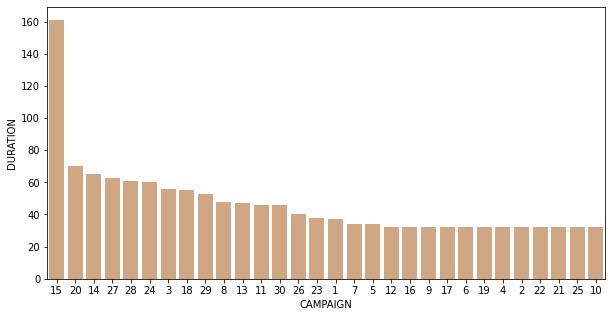

In [138]:
#Creating new column Duration in Campaign description

df_campaign_description['DURATION'] = df_campaign_description['END_DAY'] - df_campaign_description['START_DAY']
fig = plt.figure(figsize=(10,5))
sns.barplot(x="CAMPAIGN",y="DURATION",data=df_campaign_description,orient="v", color="sandybrown", saturation=.5,order=df_campaign_description.sort_values(by="DURATION",ascending=False).CAMPAIGN.values)

##Campaign table 

Campaign dataset contains identifying information for the marketing campaigns each household participated in.

In [139]:
# Campaign_table information 
df_campaign_table.head()


,DESCRIPTION,household_key,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [140]:
#Shape of campaign table data
print('Shape of the data')
df_campaign_table.shape

Shape of the data


(7208, 3)

In [141]:
print('Datatype of each column')
df_campaign_table.dtypes

Datatype of each column


DESCRIPTION      object
household_key     int64
CAMPAIGN          int64
dtype: object

In [142]:
print('Descriptive summary ')
df_campaign_table.describe()

Descriptive summary 


,household_key,CAMPAIGN
count,7208.000000,7208.000000
mean,1268.696726,15.659545
std,731.936391,6.949705
min,1.000000,1.000000
25%,644.000000,9.000000
50%,1263.000000,14.000000
75%,1924.000000,20.000000
max,2500.000000,30.000000


In [143]:
print('Number of duplicated data')
df_campaign_table.duplicated().sum()

Number of duplicated data


0

In [144]:
print('Number of Nulls in data ')
df_campaign_table.isnull().sum()

Number of Nulls in data 


DESCRIPTION      0
household_key    0
CAMPAIGN         0
dtype: int64

Out of 2500 households, 1584 of them received a campaign once, the rest never received a campaign.

In [145]:
print('Total households in dataset ')
total_households = len(df_transaction.household_key.unique())
total_households

Total households in dataset 


2500

In [146]:
print('Total Households for campaigns')
len(df_campaign_table.household_key.unique())

Total Households for campaigns


1584

We will investigate how this will effect churn rates in the following sections. The barchart below groups the households and shows counts of the group populations.

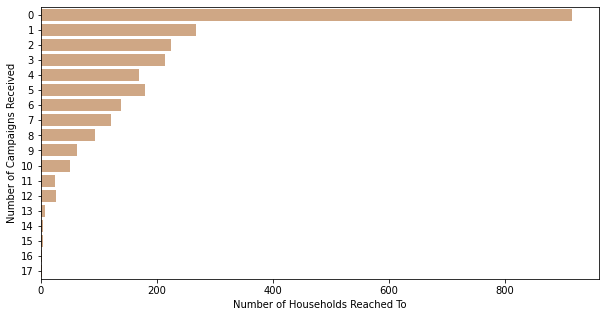

In [147]:
Number_of_campaigns_recieved_perHouse = df_campaign_table.household_key.value_counts()

Number_of_campaigns_recieved = Number_of_campaigns_recieved_perHouse.value_counts()

Number_of_campaigns_recieved[0] = total_households-len(Number_of_campaigns_recieved_perHouse)

Number_of_campaigns_recieved = pd.DataFrame(list(zip(Number_of_campaigns_recieved.index,Number_of_campaigns_recieved)),columns=["Number of Campaigns Received","Number of Households Reached To"]).sort_values(by="Number of Campaigns Received",ascending=True)

plt.figure(figsize=(10,5))

sns.barplot(y="Number of Campaigns Received",x="Number of Households Reached To",data=Number_of_campaigns_recieved,color="sandybrown", saturation=.5,orient="h",order=Number_of_campaigns_recieved["Number of Campaigns Received"])

Graph below gives the most frequent campaigns. Campaign number **18, 13 and 8** being the most frequent ones reaching 1000 and more households each 

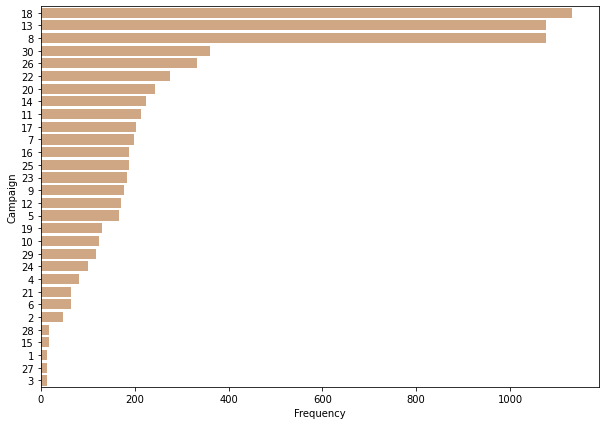

In [148]:

freq_campaigns = pd.DataFrame(list(zip(df_campaign_table.CAMPAIGN.value_counts().index, df_campaign_table.CAMPAIGN.value_counts())),columns=["Campaign","Frequency"])
fig = plt.figure(figsize=(10,7))
sns.barplot(y="Campaign",x="Frequency",data = freq_campaigns,color="sandybrown", saturation=.5,orient="h",order=freq_campaigns.Campaign)


###Coupons
Is a lookup table which lists all the coupons sent to customers as part of a campaign, as well as the products for which each coupon is redeemable


In [149]:
print('sample data of coupons')
df_coupon.head()

sample data of coupons


,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [150]:
print('Descriptive summary: ')
df_coupon.describe()

Descriptive summary: 


,COUPON_UPC,PRODUCT_ID,CAMPAIGN
count,1.245480e+05,1.245480e+05,124548.000000
mean,2.198225e+10,4.651277e+06,15.855935
std,1.961641e+10,4.843450e+06,6.015524
min,1.000009e+10,2.567100e+04,1.000000
25%,1.000009e+10,9.593030e+05,13.000000
50%,1.000009e+10,1.411451e+06,14.000000
75%,5.111108e+10,8.357538e+06,18.000000
max,5.998660e+10,1.814854e+07,30.000000


In [151]:
print('Shape of the data ')
df_coupon.shape

Shape of the data 


(124548, 3)

In [152]:
print('Number of duplicated data')
df_coupon.duplicated().sum()

Number of duplicated data


5164

Removing the dulicate values in the data 

In [153]:

print('Number of duplicated data: ')
# duplicate = df_coupon[df_coupon.duplicated(['COUPON_UPC','PRODUCT_ID','CAMPAIGN'])]
# duplicate
df_coupon.drop_duplicates(keep = 'last', inplace = True)



Number of duplicated data: 


In [154]:
print('Number of duplicated data after removng duplicates')
df_coupon.duplicated().sum()

Number of duplicated data after removng duplicates


0

In [155]:
print('Number of Nulls in data: ')
df_coupon.isnull().sum()

Number of Nulls in data: 


COUPON_UPC    0
PRODUCT_ID    0
CAMPAIGN      0
dtype: int64

###Coupon Redemption 
Is a data table, ordered by household_key, gives which household redeemed what coupon number. Also the day of the redeem and the campaign number is given for each household.

In [156]:
print('sample data ')
df_coupon_redemption.head()

sample data 


,household_key,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [157]:
print('Descriptive summary ')
df_coupon_redemption.describe()

Descriptive summary 


,household_key,DAY,COUPON_UPC,CAMPAIGN
count,2318.000000,2318.000000,2.318000e+03,2318.000000
mean,1302.816652,528.217429,4.123049e+10,15.551337
std,783.002545,100.360985,1.986068e+10,5.716636
min,1.000000,225.000000,1.000009e+10,1.000000
25%,588.000000,458.250000,1.000009e+10,13.000000
50%,1396.500000,532.000000,5.234003e+10,14.000000
75%,2004.000000,605.000000,5.430002e+10,18.000000
max,2500.000000,704.000000,5.897850e+10,30.000000


In [158]:
print('Shape of the data: ')
df_coupon_redemption.shape

Shape of the data: 


(2318, 4)

In [159]:
print('Datatype of each column: ')
df_coupon_redemption.dtypes

Datatype of each column: 


household_key    int64
DAY              int64
COUPON_UPC       int64
CAMPAIGN         int64
dtype: object

In [160]:
print('Number of duplicated data')
df_coupon_redemption.duplicated().sum()

Number of duplicated data


0

In [161]:
print('Number of Nulls in data: ')
df_coupon_redemption.isnull().sum()

Number of Nulls in data: 


household_key    0
DAY              0
COUPON_UPC       0
CAMPAIGN         0
dtype: int64

Out of 2500 households, only 434 of them (17%) redeemed coupons within this period.

In [162]:
len(df_coupon_redemption.household_key.unique())

434

Most frequent campaigns (18, 13 and 8, **all belongs to TypeA**) attracts the most number of redeems as expected. The barchart below gives the number of redeems per campaign.

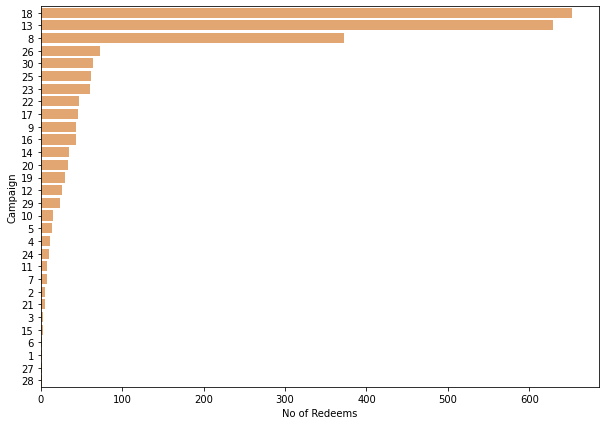

In [163]:
redeem_frequency = pd.DataFrame(list(zip(df_coupon_redemption.CAMPAIGN.value_counts().index,df_coupon_redemption.CAMPAIGN.value_counts())),columns=["Campaign","No of Redeems"])
fig = plt.figure(figsize=(10,7))
sns.barplot(y="Campaign",x="No of Redeems",data = redeem_frequency,color="sandybrown",orient="h",order=redeem_frequency.Campaign)

The barchart below gives the redeem rates of each campaign in a descending order. Campaign 13 and 18 are clearly have higher redeem rates (~**60%**) as compared to the rest of campaigns.

Based on these results, campaign organisers did well by promoting the right campaigns (13 and 18) more frequently.

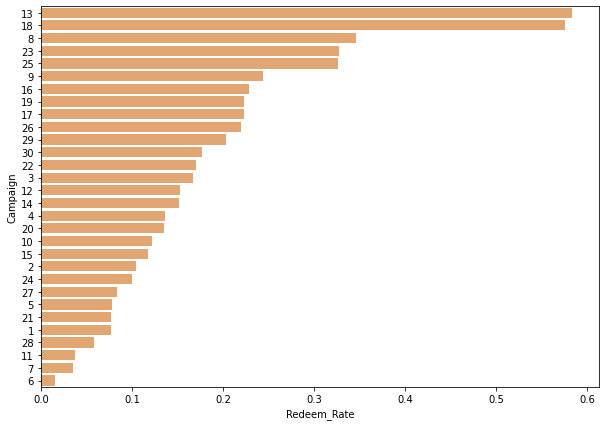

In [164]:
redems_per_camp = df_coupon_redemption.CAMPAIGN.value_counts().sort_values()/df_campaign_table.CAMPAIGN.value_counts().sort_values()
redems_per_camp = pd.DataFrame(list(zip(redems_per_camp.index,redems_per_camp)),columns=["Campaign","Redeem_Rate"]).sort_values(by="Redeem_Rate",ascending=False)
plt.figure(figsize=(10,7))
sns.barplot(y="Campaign",x="Redeem_Rate",data=redems_per_camp,orient="h",color="sandybrown",order=redems_per_camp.Campaign)


In [165]:
len(df_coupon_redemption.household_key.unique())

434

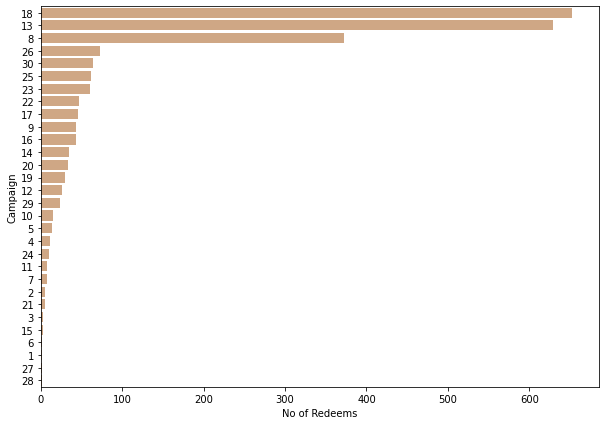

In [166]:
redeem_frequency = pd.DataFrame(list(zip(df_coupon_redemption.CAMPAIGN.value_counts().index, df_coupon_redemption.CAMPAIGN.value_counts())),columns=["Campaign","No of Redeems"])
fig = plt.figure(figsize=(10,7))
sns.barplot(y="Campaign",x="No of Redeems",data = redeem_frequency,color="sandybrown", saturation=.5,orient="h",order=redeem_frequency.Campaign)

###Transactional Data 
Transactional data contains purchase history of each household. It contains the product ID and sales value, store ID and all other transactional features.

In [167]:
print('Sample data')
df_transaction.head()

Sample data


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [168]:
print('Shape of the data:')
df_transaction.shape

Shape of the data:


(2595732, 12)

In [169]:
print('Datatype of each column: ')
df_transaction.dtypes

Datatype of each column: 


household_key          int64
BASKET_ID              int64
DAY                    int64
PRODUCT_ID             int64
QUANTITY               int64
SALES_VALUE          float64
STORE_ID               int64
RETAIL_DISC          float64
TRANS_TIME             int64
WEEK_NO                int64
COUPON_DISC          float64
COUPON_MATCH_DISC    float64
dtype: object

In [170]:
print('Descriptive summary: ')
df_transaction.describe()

Descriptive summary: 


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06
mean,1.271953e+03,3.402620e+10,3.887562e+02,2.891435e+06,1.004286e+02,3.104120e+00,3.142673e+03,-5.387054e-01,1.561586e+03,5.622150e+01,-1.641600e-02,-2.918564e-03
std,7.260660e+02,4.711649e+09,1.897210e+02,3.837404e+06,1.153436e+03,4.182274e+00,8.937113e+03,1.249191e+00,3.998378e+02,2.710223e+01,2.168410e-01,3.969004e-02
min,1.000000e+00,2.698485e+10,1.000000e+00,2.567100e+04,0.000000e+00,0.000000e+00,1.000000e+00,-1.800000e+02,0.000000e+00,1.000000e+00,-5.593000e+01,-7.700000e+00
25%,6.560000e+02,3.040805e+10,2.290000e+02,9.174590e+05,1.000000e+00,1.290000e+00,3.300000e+02,-6.900000e-01,1.308000e+03,3.300000e+01,0.000000e+00,0.000000e+00
50%,1.272000e+03,3.276081e+10,3.900000e+02,1.028816e+06,1.000000e+00,2.000000e+00,3.720000e+02,-1.000000e-02,1.613000e+03,5.600000e+01,0.000000e+00,0.000000e+00
75%,1.913000e+03,4.012685e+10,5.530000e+02,1.133018e+06,1.000000e+00,3.490000e+00,4.220000e+02,0.000000e+00,1.843000e+03,8.000000e+01,0.000000e+00,0.000000e+00
max,2.500000e+03,4.230536e+10,7.110000e+02,1.831630e+07,8.963800e+04,8.400000e+02,3.428000e+04,3.990000e+00,2.359000e+03,1.020000e+02,0.000000e+00,0.000000e+00


In [171]:
print('Number of duplicated data: ')
df_transaction.duplicated().sum()

Number of duplicated data: 


0

In [172]:
print('Number of Nulls in data: ')
df_transaction.isnull().sum()

Number of Nulls in data: 


household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [173]:
# Check number of rows with QUANTITY == 0 or SALES_VALUE == 0
invalid_rows = df_transaction[(df_transaction.SALES_VALUE == 0) | (df_transaction.QUANTITY == 0)]
print('Number of rows to be removed: ', invalid_rows.shape[0])
invalid_rows.head()

Number of rows to be removed:  18917


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
97,744,26985165432,1,5978648,0,0.0,31582,0.0,1119,1,0.0,0.0
128,1287,26985336468,1,5978648,0,0.0,304,0.0,1351,1,0.0,0.0
249,2305,26996870743,2,5978656,0,0.0,414,0.0,1300,1,-1.0,0.0
293,271,26997082949,2,5978656,0,0.0,329,0.0,1719,1,-2.0,0.0
694,315,27008952267,3,957951,0,0.0,327,0.0,1707,1,0.0,0.0


In [174]:
# Removing these rows loses no information as they contain none.
df_transaction = df_transaction[~((df_transaction.SALES_VALUE == 0) | (df_transaction.QUANTITY == 0))]
df_transaction.shape

(2576815, 12)

Descriptive analysis on the transactional data. 

In [175]:
# Grouping data by household numbers
grouped_Household_sum = df_transaction.groupby("household_key").sum()

In [176]:
# Average amount of purchase by a household
av_purchase = round(df_transaction.SALES_VALUE.sum()/len(grouped_Household_sum),1)
av_purchase

3223.0

In [177]:
# Average total number of products purchased by a household
av_total_prod_purchase = round(grouped_Household_sum["QUANTITY"].mean(),1)
av_total_prod_purchase

104272.4

In [178]:
#Average total number of unique products purchased by a household
av_uniq_prod = round(len(df_transaction.groupby(["household_key","PRODUCT_ID"]).sum()["QUANTITY"])/len(grouped_Household_sum),1)
av_uniq_prod

556.9

In [179]:
# Average number of store visits per household
av_days_visited = round(len(df_transaction.groupby(["household_key","DAY"]).count())/len(grouped_Household_sum),1)
av_days_visited

90.1

**Top 30** stores based on total sales amount (USD) is calculated and plotted below. Stores with IDs of **367** and **406** made the most sales amongst 582 stores with over $200,000 each.

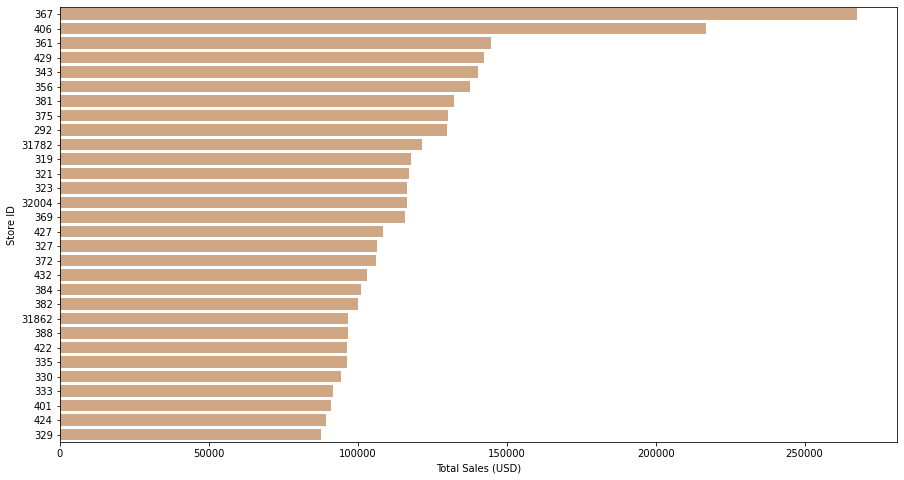

In [180]:
sales_per_store = df_transaction.groupby("STORE_ID").sum()["SALES_VALUE"].sort_values(ascending=False)
sales_per_store = pd.DataFrame(list(zip(sales_per_store.index,sales_per_store)),columns=["Store ID","Total Sales (USD)"])
fig_store = plt.figure(figsize=(15,8))
sns.barplot(y="Store ID",x="Total Sales (USD)",data = sales_per_store[:30],color="sandybrown", saturation=.5,order=sales_per_store[:30]["Store ID"],orient="h")

**Top 30** customers based on total purchase amount (USD) is calculated and displayed below. Top customer is with the ID of **1023** who made the most purchases amongst 2500 house holds with almost $40,000.

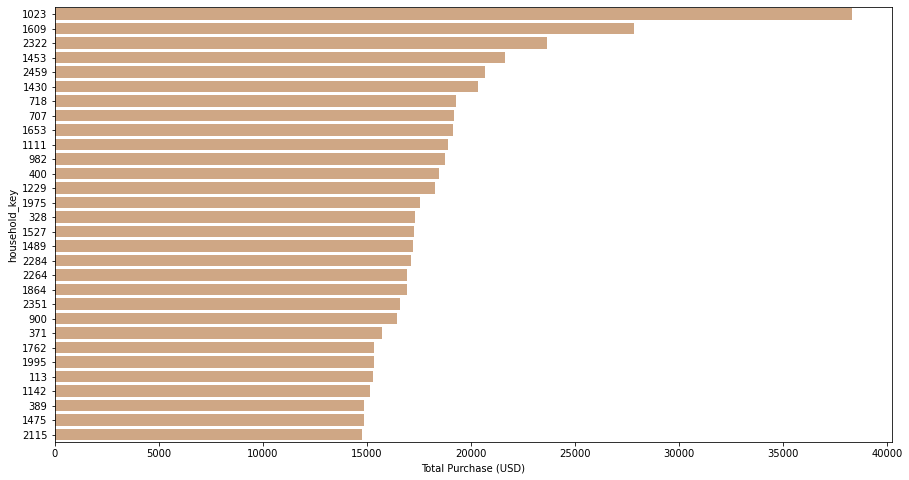

In [181]:
purc_per_cust = df_transaction.groupby("household_key").sum()["SALES_VALUE"].sort_values(ascending=False)
purc_per_cust = pd.DataFrame(list(zip(purc_per_cust.index,purc_per_cust)),columns=["household_key","Total Purchase (USD)"])
fig_store = plt.figure(figsize=(15,8))
sns.barplot(y="household_key",x="Total Purchase (USD)",data = purc_per_cust[:30],color="sandybrown", saturation=.5,order=purc_per_cust[:30]["household_key"],orient="h")

###Demographic Data
Demographics data contains household demographical information such as age group, marital status and househols size.

In [182]:
print('sample data ')
df_demographic.head()

sample data 


,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [183]:
print('Descriptive summary: ')
df_demographic.describe()

Descriptive summary: 


,household_key
count,801.000000
mean,1235.176030
std,736.804647
min,1.000000
25%,596.000000
50%,1218.000000
75%,1914.000000
max,2499.000000


In [184]:
print('Shape of the data: ')
df_demographic.shape

Shape of the data: 


(801, 8)

In [185]:
print('Datatype of each column: ')
df_demographic.dtypes

Datatype of each column: 


AGE_DESC               object
MARITAL_STATUS_CODE    object
INCOME_DESC            object
HOMEOWNER_DESC         object
HH_COMP_DESC           object
HOUSEHOLD_SIZE_DESC    object
KID_CATEGORY_DESC      object
household_key           int64
dtype: object

In [186]:
print('Number of duplicated data: ')
df_demographic.duplicated().sum()

Number of duplicated data: 


0

In [187]:
print('Number of Nulls in data: ')
df_demographic.isnull().sum()

Number of Nulls in data: 


AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
household_key          0
dtype: int64

Demographics EDA based ondifferent features

Majority of the customers age in between **35-54** (~60%)

(-1.1249323181235082,
 1.101187257671007,
 -1.1189531000393695,
 1.117382213117571)

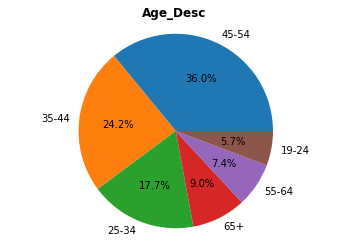

In [188]:
#AGE
df_demographic['AGE_DESC'].value_counts().plot(kind='pie',autopct='%1.1f%%',textprops={'fontweight':'light','fontsize': 10})
plt.ylabel('')
plt.title('Age_Desc',fontweight="bold",fontsize = 12)
plt.axis('equal')

Married couples are almost **3** times the singles

(-1.1260817619446166,
 1.1012419886640294,
 -1.104405501153327,
 1.1268551722782911)

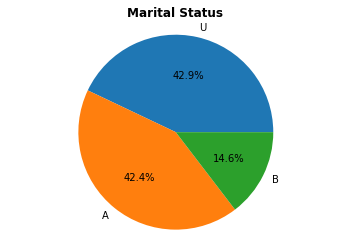

In [189]:
#Marital Status
df_demographic['MARITAL_STATUS_CODE'].value_counts().plot(kind='pie',autopct='%1.1f%%',textprops={'fontweight':'light','fontsize': 10})
plt.ylabel('')
plt.title('Marital Status',fontweight="bold",fontsize = 12)
plt.axis('equal')


Since all variables are categorical in the demographics dataset, we have used our _pie_categorical_ function. The pie charts below gives the distribution of each categorical variable in the demographics dataset.

Some interesting findings:
* Majority of the customers age in between **35-54** (~60%)
* Married couples are almost **3** times the singles
* Almost **half** of the population have a yearly salary between **$35-74K**
* Majority of the customers own a house (**63%**)
* Majority of the customers does not have a child (**~70%**)

Almost **half** of the population have a yearly salary between **$35-74K**

(-1.1076373616985349,
 1.100363683910443,
 -1.1054101417038322,
 1.1134420342264535)

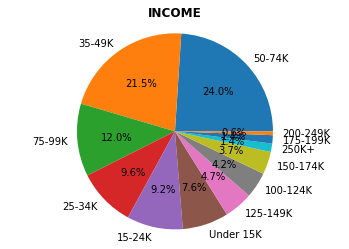

In [190]:
#Income
df_demographic['INCOME_DESC'].value_counts().plot(kind='pie',autopct='%1.1f%%',textprops={'fontweight':'light','fontsize': 10})
plt.ylabel('')
plt.title('INCOME',fontweight="bold",fontsize = 12)
plt.axis('equal')


Majority of the customers own a house (**63%**)

(-1.1142111369666718,
 1.1006767243344495,
 -1.112743206214428,
 1.1118164242570245)

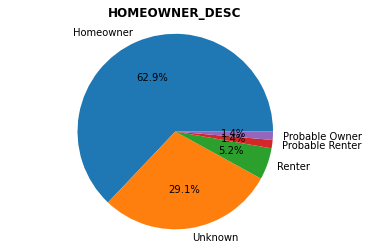

In [191]:
#HOMEOWNER_DESC
df_demographic['HOMEOWNER_DESC'].value_counts().plot(kind='pie',autopct='%1.1f%%',textprops={'fontweight':'light','fontsize': 10})
plt.ylabel('')
plt.title('HOMEOWNER_DESC',fontweight="bold",fontsize = 12)
plt.axis('equal')


Majority of the customers does not have a child (**~70%**)

(-1.1278592635312417,
 1.101326637627931,
 -1.1085444796982387,
 1.1101790501364628)

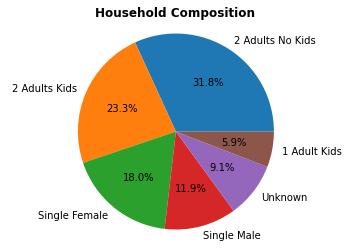

In [192]:
#HH_COMP_DESC
df_demographic['HH_COMP_DESC'].value_counts().plot(kind='pie',autopct='%1.1f%%',textprops={'fontweight':'light','fontsize': 10})
plt.ylabel('')
plt.title('Household Composition',fontweight="bold",fontsize = 12)
plt.axis('equal')


Majority of the customers' household size is 2 or less than 2

(-1.1144459215123892,
 1.1006879078268506,
 -1.1091169980384887,
 1.118511794542045)

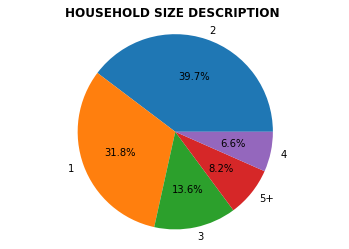

In [193]:
#HOUSEHOLD_SIZE_DESC
df_demographic['HOUSEHOLD_SIZE_DESC'].value_counts().plot(kind='pie',autopct='%1.1f%%',textprops={'fontweight':'light','fontsize': 10})
plt.ylabel('')
plt.title('HOUSEHOLD SIZE DESCRIPTION ',fontweight="bold",fontsize = 12)
plt.axis('equal')


(-1.1166664166560933,
 1.100793642739804,
 -1.1114982991139322,
 1.1114987241925642)

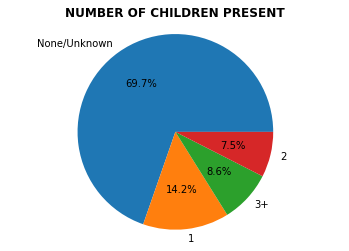

In [194]:
#KID_CATEGORY_DESC
df_demographic['KID_CATEGORY_DESC'].value_counts().plot(kind='pie',autopct='%1.1f%%',textprops={'fontweight':'light','fontsize': 10})
plt.ylabel('')
plt.title('NUMBER OF CHILDREN PRESENT',fontweight="bold",fontsize = 12)
plt.axis('equal')


In [195]:
print('sample data ')
df_product.head()

sample data 


,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [196]:
print('Shape of the data: ')
df_product.shape

Shape of the data: 


(92353, 7)

In [197]:
print('Datatype of each column: ')
df_product.dtypes

Datatype of each column: 


PRODUCT_ID               int64
MANUFACTURER             int64
DEPARTMENT              object
BRAND                   object
COMMODITY_DESC          object
SUB_COMMODITY_DESC      object
CURR_SIZE_OF_PRODUCT    object
dtype: object

In [198]:
print('Descriptive summary: ')
df_product.describe()

Descriptive summary: 


,PRODUCT_ID,MANUFACTURER
count,9.235300e+04,92353.00000
mean,5.328353e+06,1739.22833
std,5.359937e+06,1818.26957
min,2.567100e+04,1.00000
25%,9.706280e+05,328.00000
50%,1.621091e+06,1094.00000
75%,9.704770e+06,2264.00000
max,1.831630e+07,6477.00000


In [199]:
print('Number of duplicated data: ')
df_product.duplicated().sum()

Number of duplicated data: 


0

In [200]:
print('Number of Nulls in data: ')
df_product.isnull().sum()

Number of Nulls in data: 


PRODUCT_ID              0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64

#CHURN PREDICTION

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency (Log)')

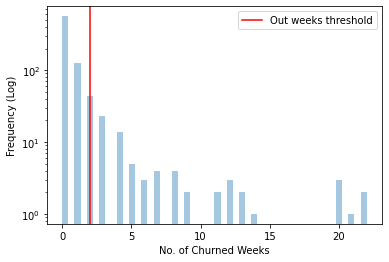

In [201]:
out_weeks_threshold = 2

#weekly customer purchase amount
weekly_purchase = df_transaction.groupby(["household_key","WEEK_NO"]).sum()["SALES_VALUE"]
weekly_purchase = weekly_purchase.unstack()

#customer churned by their last 2 week's purchasing behaviour
#go through all households and calculate out weeks
target = []
common_houses = set(df_demographic.household_key) & set(df_transaction.household_key)
for house in common_houses:
  target.append(102-weekly_purchase.loc[house].dropna().index[-1])

target = pd.DataFrame(list(zip(common_houses,target)),columns=["household_key","No. of Churned Weeks"])
ax = sns.distplot(target["No. of Churned Weeks"],kde=False)
ax.axvline(x=out_weeks_threshold,c="red",label="Out weeks threshold")
ax.legend()
ax.set_yscale("log")
ax.set_ylabel("Frequency (Log)")

Now lets generate our target variable for modelling: 
* Churned -> True
* Not Churned -> False

In [202]:
target["gotChurned"] = target["No. of Churned Weeks"]>=out_weeks_threshold
target.drop("No. of Churned Weeks",axis=1,inplace=True)

Text(0.5, 1.0, 'Churn Variable Distribution')

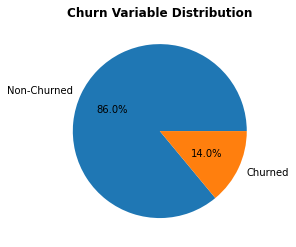

In [203]:
target.gotChurned.value_counts().plot(kind="pie",autopct="%.1f%%",labels=["Non-Churned","Churned"])
plt.ylabel("")
plt.title("Churn Variable Distribution",fontweight="bold")

### Feature engineering




Features from the _"Campaign Table"_, _"*Transaction Data*"_ and _"Coupon Redempt"_ tables to be used in the churn prediction model:


**Feature 1**: List of campaigns received by each household:

In [204]:
household_per_campaign = df_campaign_table.groupby("CAMPAIGN")["household_key"].apply(list)
total_campaigns = len(df_campaign_table.CAMPAIGN.unique())
df_camp = pd.DataFrame(np.full((total_households,total_campaigns),0),columns=["Camp_"+str(i) for i in range(1,total_campaigns+1)],index=range(1,total_households+1))
for camp in household_per_campaign.index:
    df_camp.loc[household_per_campaign[camp],"Camp_"+str(camp)] = 1

df_camp["household_key"] = df_camp.index

**Feature 2**: Total number of received campaigns per household:

In [205]:
temp = df_campaign_table.household_key.value_counts().sort_index()
no_of_received_campaigns = pd.DataFrame(list(zip(temp.index,temp.values.astype(int))),columns=["household_key","no_of_received_campaigns"])

We have checked if the number of campaigns recieved by a household affects its purchase behaviour.We visualised the correlation between the number of campaigns recieved by a household and thier total purchase amount , and they are **linearly related**.v

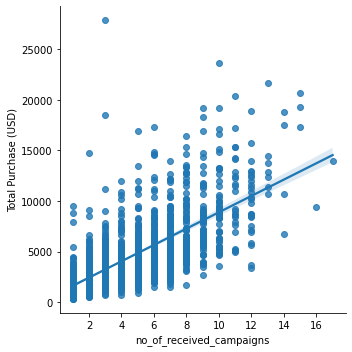

In [206]:
no_of_received_campaigns_vs_sumsales = pd.merge(no_of_received_campaigns,purc_per_cust,on="household_key")
sns.lmplot(x="no_of_received_campaigns",y="Total Purchase (USD)",data=no_of_received_campaigns_vs_sumsales)

In [207]:
no_of_received_campaigns_vs_sumsales.drop("household_key",axis=1).corr()

,no_of_received_campaigns,Total Purchase (USD)
no_of_received_campaigns,1.000000,0.704408
Total Purchase (USD),0.704408,1.000000


The scatter plot and the correlation value above (71%) indicates that the total purchase amount of a household is positively correlated to the number of campaigns received by them.

**Feature 3**: List of campaigns resulted in coupon redemption:

In [208]:
temp = df_coupon_redemption.groupby("household_key")["CAMPAIGN"].apply(list)
rede_camp_history_per_household = pd.DataFrame(list(zip(temp.index,temp.values)),columns=["household_key","redeemed_CAMPAIGN_list"])


**Feature 4**: The number of redemptions made by each household:



In [209]:
temp = df_coupon_redemption.household_key.value_counts().sort_index()
no_of_rede_per_household = pd.DataFrame(list(zip(temp.index,temp.values.astype(int))),columns=["household_key","no_of_redeems"])

**Feature 5**: Most Frequent Campaign Type (A,B,C) received by each household:


In [210]:
camp_list = df_campaign_table.groupby("household_key")["DESCRIPTION"].apply(list)
most_freq_type = pd.DataFrame(list(zip(camp_list.index,[pd.Series(i).value_counts().idxmax() for i in camp_list])),columns=["household_key","most_freq_camp_type"])

**Feature 6**: Top 5 stores with high number of households which have more high out weeks:


In [211]:
store_per_house = df_transaction.groupby("household_key")["STORE_ID"].apply(list).apply(np.unique)

churn_houses = set(target.household_key[target.gotChurned == True].sort_values().values) & set(df_demographic.household_key.unique())
churn_stores = []
for i in churn_houses:
  churn_stores.extend(store_per_house[i])

churn_stores = pd.Series(churn_stores).value_counts()/len(churn_houses)

df_store = df_transaction.groupby(["STORE_ID","household_key"]).count()["BASKET_ID"].unstack("STORE_ID")
df_store.replace(np.nan,0,inplace=True)
df_store[df_store>0] = 1

#select the top stores with high number of churners
df_store = df_store.loc[:,churn_stores.index[:20]]
df_store.columns=["Store_"+str(i) for i in df_store.columns]

**Feature 7**: Amount of purchase of a household within two years:


In [212]:
purc_per_cust = df_transaction.groupby("household_key").sum()["SALES_VALUE"].sort_values(ascending=False)
purc_per_cust = pd.DataFrame(list(zip(purc_per_cust.index,purc_per_cust)),columns=["household_key","Total Purchase (USD)"])

### Last touches on the dataset

Generate the final dataframe to be used for predictive modelling

In [213]:
data = pd.merge(df_demographic,df_camp,on="household_key",how="left")
data = pd.merge(data,no_of_received_campaigns,on="household_key",how="left")
data = pd.merge(data,df_store,on="household_key",how="left")
data = pd.merge(data,no_of_rede_per_household,on="household_key",how="left")
data = pd.merge(data,most_freq_type,on="household_key",how="left")
data = pd.merge(data,purc_per_cust,on="household_key",how="left")
data = pd.merge(data,target,on="household_key",how="left")

In [214]:
data.describe()


,household_key,Camp_1,Camp_2,Camp_3,Camp_4,Camp_5,Camp_6,Camp_7,Camp_8,Camp_9,...,Store_343,Store_421,Store_321,Store_433,Store_319,Store_320,Store_375,Store_292,no_of_redeems,Total Purchase (USD)
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,311.000000,801.000000
mean,1235.176030,0.007491,0.023720,0.011236,0.068664,0.126092,0.061174,0.144819,0.722846,0.143571,...,0.107366,0.091136,0.074906,0.074906,0.098627,0.047441,0.114856,0.088639,5.967846,5615.120612
std,736.804647,0.086278,0.152272,0.105468,0.253040,0.332161,0.239798,0.352138,0.447873,0.350873,...,0.309771,0.287982,0.263405,0.263405,0.298346,0.212712,0.319048,0.284400,6.527776,3750.938976
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,646.400000
25%,596.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2970.100000
50%,1218.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4676.430000
75%,1914.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,7164.990000
max,2499.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,27859.680000


Change NaN or None/Unknown values to zero for the columns of "number of received campaigns", "kid category" and the "number of redeems"

In [215]:
data.no_of_received_campaigns.replace(np.nan,0,inplace=True)
data.no_of_received_campaigns = data.no_of_received_campaigns.astype(int)
data.no_of_redeems.replace(np.nan,0,inplace=True)

In [216]:
data.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,Camp_1,Camp_2,...,Store_321,Store_433,Store_319,Store_320,Store_375,Store_292,no_of_redeems,most_freq_camp_type,Total Purchase (USD),gotChurned
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,TypeB,4330.16,False
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TypeB,3400.05,False
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,TypeB,5534.97,False
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.0,TypeB,13190.92,False
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TypeA,1512.02,True


Change other object type elements in the columns to integer for modeling purpose

In [217]:
data.KID_CATEGORY_DESC.replace(["None/Unknown","3+"],[0,3],inplace=True)
data.KID_CATEGORY_DESC = data.KID_CATEGORY_DESC.astype(int)
data.HOUSEHOLD_SIZE_DESC.replace("5+",5,inplace=True)
data.HOUSEHOLD_SIZE_DESC = data.HOUSEHOLD_SIZE_DESC.astype(int)
data["Total Purchase (USD)"] = data["Total Purchase (USD)"].astype(int)

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AGE_DESC                  801 non-null    object 
 1   MARITAL_STATUS_CODE       801 non-null    object 
 2   INCOME_DESC               801 non-null    object 
 3   HOMEOWNER_DESC            801 non-null    object 
 4   HH_COMP_DESC              801 non-null    object 
 5   HOUSEHOLD_SIZE_DESC       801 non-null    int64  
 6   KID_CATEGORY_DESC         801 non-null    int64  
 7   household_key             801 non-null    int64  
 8   Camp_1                    801 non-null    int64  
 9   Camp_2                    801 non-null    int64  
 10  Camp_3                    801 non-null    int64  
 11  Camp_4                    801 non-null    int64  
 12  Camp_5                    801 non-null    int64  
 13  Camp_6                    801 non-null    int64  
 14  Camp_7    

In [219]:
data.dtypes.value_counts()

int64      35
float64    21
object      6
bool        1
dtype: int64

Let's see how our features interact with the target variable. Start with the _"**Age**"_ variable:

* Households with the **age of 55-64** tend to churn less then the rest of other age groups
* No monotonic increase or decrease observed with age



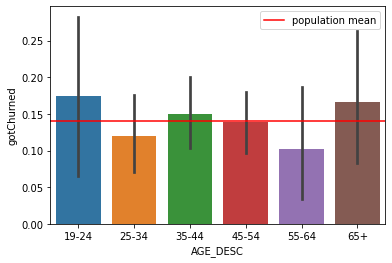

In [220]:
ax = sns.barplot(x="AGE_DESC",y="gotChurned",data=data,order=["19-24","25-34","35-44","45-54","55-64","65+"])
ax.axhline(y=data.gotChurned.sum()/len(data),c="red",label="population mean")
ax.legend()

**Marital Status** vs Churn rate:
* Married couples (Group A) tend to churn more compared to singles (Group B)
* Unknown (Group U) households increase the chun rate of the population

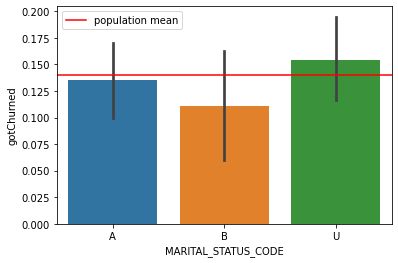

In [221]:
ax = sns.barplot(x="MARITAL_STATUS_CODE",y="gotChurned",data=data,order=["A","B","U"])
ax.axhline(y=data.gotChurned.sum()/len(data),c="red",label="population mean")
ax.legend()

**Income** vs Churn Rate:
* No monotonic increase or decrease observed over the income groups
* However as seen in the barchart below, no churn was observed when a household's income reaches to 175K and more (27 samples out of 801 households)

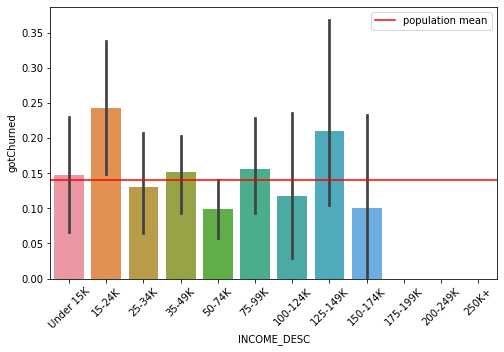

In [222]:
fig = plt.figure(figsize=(8,5))
ax = sns.barplot(x="INCOME_DESC",y="gotChurned",data=data,
                 order=["Under 15K","15-24K","25-34K","35-49K","50-74K","75-99K","100-124K","125-149K","150-174K","175-199K","200-249K","250K+"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.axhline(y=data.gotChurned.sum()/len(data),c="red",label="population mean")
ax.legend()

**Home Ownership** vs Churn Rate:
* No significant differences between owners and renters

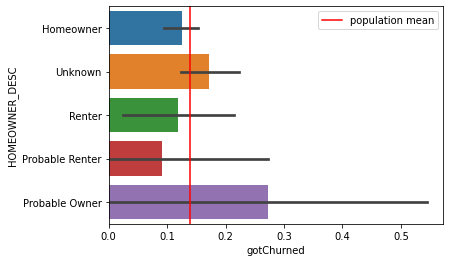

In [223]:
ax = sns.barplot(y="HOMEOWNER_DESC",x="gotChurned",data=data,orient="h")
ax.axvline(x=data.gotChurned.sum()/len(data),c="red",label="population mean")
ax.legend()

**Number of Redeems** vs Churn Rate:

Lets group our data based on household's number of redeems. We will use pandas.cut which groups the number of redeems into the bins. Graph below separates 0 redeemers, redeemed once and the final group redeemed more than once:
* Churn rate decreases as the number of redeems increase

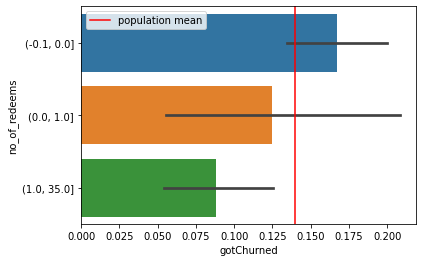

In [224]:
ax = sns.barplot(y=pd.cut(data.no_of_redeems,bins=[-0.1,0,1,35],duplicates="drop"),x="gotChurned",data=data,orient="h")
ax.axvline(x=data.gotChurned.sum()/len(data),c="red",label="population mean")
ax.legend()

Churn rate vs **Number of campaigns received by a household**

* Churn rate decreases as the number of campaigns received by a household increases

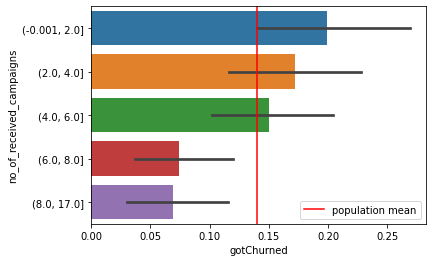

In [225]:
ax = sns.barplot(y=pd.qcut(data.no_of_received_campaigns,5,duplicates="drop"),x="gotChurned",data=data,orient="h")
ax.axvline(x=data.gotChurned.sum()/len(data),c="red",label="population mean")
ax.legend()

Not very clear, however churn rate tends to decrease when **children starts to appear** in households

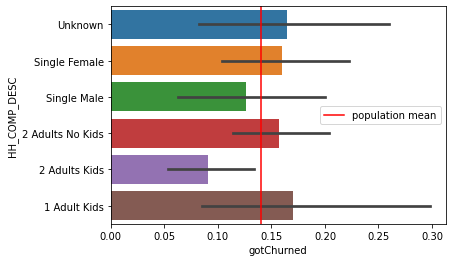

In [226]:
ax = sns.barplot(y="HH_COMP_DESC",x="gotChurned",data=data,orient="h",order=['Unknown','Single Female','Single Male','2 Adults No Kids','2 Adults Kids','1 Adult Kids'])
ax.axvline(x=data.gotChurned.sum()/len(data),c="red",label="population mean")
ax.legend()

Churn rate tends to decrease as the number of **family members** increases

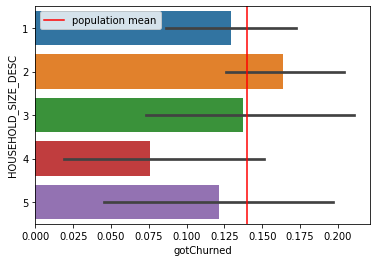

In [227]:
ax = sns.barplot(y="HOUSEHOLD_SIZE_DESC",x="gotChurned",data=data,orient="h")
ax.axvline(x=data.gotChurned.sum()/len(data),c="red",label="population mean")
ax.legend()

**Campaign Type** vs Churn rate:

* TypeC campaign fails as all households which was approached with campaign C are churned. However note that it has extremely lower sample size (1% of all population)
* TypeB is the most successful one with the lowest churn rate

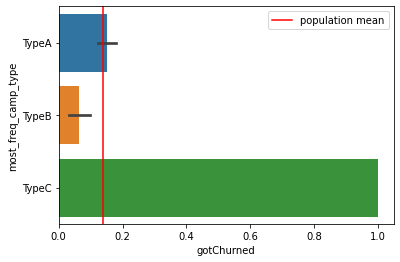

In [228]:
ax = sns.barplot(y="most_freq_camp_type",x="gotChurned",data=data,orient="h",order=['TypeA','TypeB','TypeC'])
ax.axvline(x=data.gotChurned.sum()/len(data),c="red",label="population mean")
ax.legend()

**Total purchase of a household** vs Churn rate:
* Total purchase amount of a customer is a clear separator, expected to perform well as a feature in the churn prediction model
* Churn rate decreases as total amount of purchase of a household (within 2 years) increases


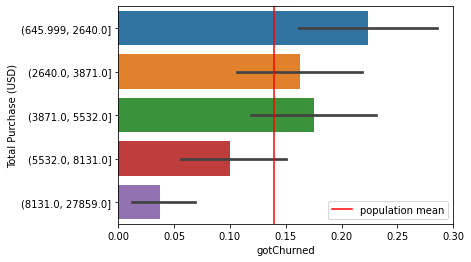

In [229]:
ax = sns.barplot(y=pd.qcut(data["Total Purchase (USD)"],5,duplicates="drop"),x="gotChurned",data=data,orient="h")
ax.axvline(x=data.gotChurned.sum()/len(data),c="red",label="population mean")
ax.legend()


Correlation between **Campaign Number** and the Target (gotChurned) are calculated and displayed in the barchart below:
* Campaign 25 as a feature expected to be performing well in the model as it has the highest correlation with the target variable

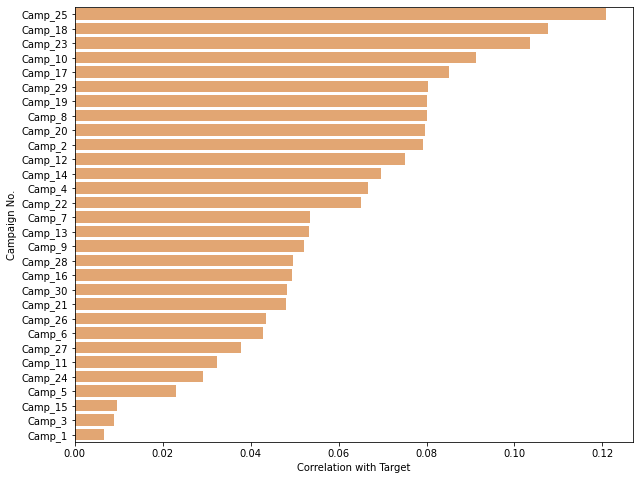

In [230]:
corrs = abs(data[["Camp_"+str(i) if i<31 else "gotChurned" for i in range(1,32)]].corr()["gotChurned"])
corrs.drop("gotChurned",inplace=True)
corrs = pd.DataFrame(list(zip(corrs.index,corrs)),columns=["Campaign No.","Correlation with Target"]).sort_values(by="Correlation with Target",ascending=False)
fig_store = plt.figure(figsize=(10,8))
sns.barplot(y="Campaign No.",x="Correlation with Target",data = corrs,color="sandybrown",orient="h")

Correlation between the **stores** with high number of churner customers and the Target (isChurned) are calculated and displayed in the barchart below:

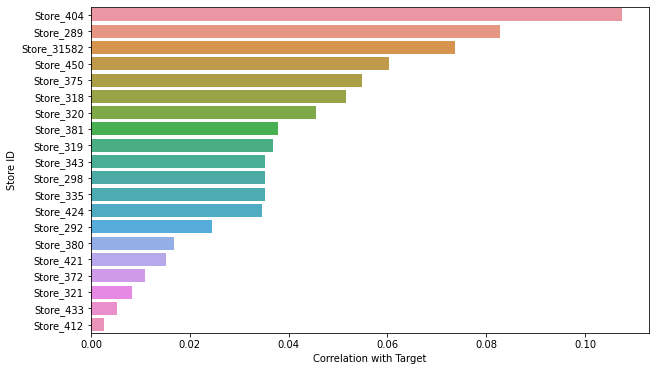

In [231]:
cols =list(df_store.columns)
cols.extend(["gotChurned"])
corrs = abs(data[cols].corr()["gotChurned"])
corrs.drop("gotChurned",inplace=True)
corrs = pd.DataFrame(list(zip(corrs.index,corrs)),columns=["Store ID","Correlation with Target"]).sort_values(by="Correlation with Target",ascending=False)
fig_store = plt.figure(figsize=(10,6))
sns.barplot(y="Store ID",x="Correlation with Target",data = corrs,orient="h")

### ML Model Training & Testing
In this section we will train a Machine Learning model with the training data. The machine learning model is chosen as **XGBoost** (Extreme Gradient Boosting) as they are known to be performing well with imbalanced datasets like ours.

In [232]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

#one hot encoding categorical data for modelling
encoded = pd.get_dummies(data[data.columns[data.dtypes==object]])
data_encoded = pd.concat([encoded, data[data.columns[data.dtypes != object]]],axis=1)

#Features (X) and the target (y)
X = data_encoded.drop("gotChurned",axis=1)
y = data_encoded.gotChurned

#lets start with the default hyperparameters and hold-out mechanism for train/test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

#XGBoost
xgb_mdl = XGBClassifier().fit(X_train.values,y_train.values)
xgb_mdl

XGBClassifier()

In [233]:
X_test.head()

,AGE_DESC_19-24,AGE_DESC_25-34,AGE_DESC_35-44,AGE_DESC_45-54,AGE_DESC_55-64,AGE_DESC_65+,MARITAL_STATUS_CODE_A,MARITAL_STATUS_CODE_B,MARITAL_STATUS_CODE_U,INCOME_DESC_100-124K,...,Store_343,Store_421,Store_321,Store_433,Store_319,Store_320,Store_375,Store_292,no_of_redeems,Total Purchase (USD)
744,1,0,0,0,0,0,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10685
80,0,1,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4521
84,0,0,0,1,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5231
501,0,0,0,1,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3948
39,0,1,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3461


We first transformed our categorical variables using one-hot encoding algorithm (get_dummies) to be able to use in our classifier. Then separated the data into train and test 75%/25%. Then generated an XGBoost classifier with it's default parameters and trained it with the training set. 

Now let's test our trained classifier with test data:

Train Data Classification Report:

              precision    recall  f1-score   support

       False       0.89      1.00      0.94       515
        True       0.95      0.22      0.36        85

    accuracy                           0.89       600
   macro avg       0.92      0.61      0.65       600
weighted avg       0.90      0.89      0.86       600

Test Data Classification Report:

              precision    recall  f1-score   support

       False       0.87      1.00      0.93       174
        True       1.00      0.04      0.07        27

    accuracy                           0.87       201
   macro avg       0.94      0.52      0.50       201
weighted avg       0.89      0.87      0.82       201



[Text(33.0, 0.5, 'real values'),
 Text(0.5, 15.0, 'predicted values'),
 Text(0.5, 1.0, 'Confusion Matrix')]

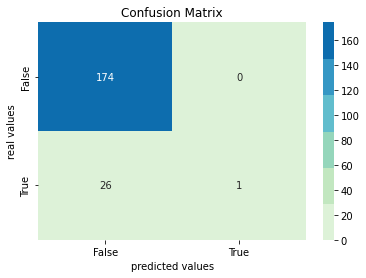

In [234]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, average_precision_score

#XGBoost
y_pred_train = xgb_mdl.predict(X_train.values)
y_pred = xgb_mdl.predict(X_test.values)

print("Train Data Classification Report:\n")
print(classification_report(y_train,y_pred_train))

print("Test Data Classification Report:\n")
print(classification_report(y_test,y_pred))

#generate a confusion matrix to visualise precision, recall, misclassification and false alarms
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index = list(set(y)), columns = list(set(y)))

#visualise the confusion matrix in the heatmap form
plt.figure()
sns.heatmap(cm, annot = True, fmt="d",
            cmap=sns.color_palette("GnBu")).set(xlabel='predicted values', 
                                                ylabel='real values', 
                                                title = 'Confusion Matrix')

In [235]:
y_pred[:5]

array([False, False, False, False, False])

In [236]:
y_test[:5]

744     True
80     False
84     False
501    False
39     False
Name: gotChurned, dtype: bool

In [237]:
roc_auc_score(y_test,y_pred)
# average_precision_score(y_test,y_pred)

0.5185185185185185

Even though accuracy for the test set is 85% it is misleading as our target variable is **skewed** towards not churned (86% are not churned). Even a very basic model which selects majority class all times would score 86% accuracy.

Therefore we will have to focus on how well our model performs on the minority class (churned households). On the test set we have 201 samples only 28 of them being churned. Our model could not manage to detect any of them, therefore test set recall has come out as 7%. This is the part we need to aim to increase.

Now lets try to enhance our model by optimising hyperparameters by using "**Randomised Search**" with "**Cross-Validation**".


We need to determine the evaluation criteria (scorer) to be optimised for the Randomised Search. Lets see the available scorers:
* **average precision**, **balanced accuracy**, **roc_auc**, **f1** are the scorers which are commonly used for imbalanced dataset classifications as they handle situation well as compared to other metrics

In [238]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [239]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV

#handle class imbalance problem by undersampling (not used)
# no_churn_down_sampled = data_encoded[data_encoded.gotChurned == False].sample(sum(data_encoded.gotChurned))
# data_encoded_balanced = pd.concat([no_churn_down_sampled,data_encoded[data_encoded.gotChurned]])
#shuffle the dataset to avoiding sampling biases
# data = data_encoded_balanced.sample(frac=1)

#shuffle the dataset to avoiding sampling biases
data = data_encoded.sample(frac=1)
X = data.drop("gotChurned",axis=1)
y = data.gotChurned

#generate an XGB classifier
mdl = XGBClassifier()

#parameter ranges
param_list = {
    'silent': [False],
    'max_depth': range(2,51),
    'learning_rate': [0.001, 0.01, 0.1, 0.15],
    'subsample': np.arange(0,1.1,.1),
    'colsample_bytree': np.arange(0,1.1,.1),
    'colsample_bylevel': np.arange(0,1.1,.1),
    'min_child_weight': [0.5, 0.7, 1.0, 2.0, 3.0],
    'gamma': [0, 0.25, 0.5, 0.75, 0.9, 1.0],
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0],
    'n_estimators': [2, 5, 10, 20, 50, 100],
    'scale_pos_weight': [1, 1.5, 2, 6, 6.1, 6.3, 6.5, 8],
    'max_delta_step': [1, 2, 3, 5, 10]
}

kfold = 5
cv_strat = RepeatedStratifiedKFold(n_splits=kfold,n_repeats=10)

#Randomized Search
# cv = RandomizedSearchCV(mdl,param_list,cv=cv_strat,n_iter=100,verbose=1,scoring="roc_auc",n_jobs=-1).fit(X.values,y.values)
cv = RandomizedSearchCV(mdl,param_list,cv=cv_strat,n_iter=100,verbose=1,scoring="balanced_accuracy",n_jobs=-1).fit(X.values,y.values)
# cv = RandomizedSearchCV(mdl,param_list,cv=cv_strat,n_iter=100,verbose=1,scoring="average_precision",n_jobs=-1).fit(X.values,y.values)

#use the best estimator after the hyperparameter optimisation
mdl_best = cv.best_estimator_

Fitting 50 folds for each of 100 candidates, totalling 5000 fits


In [240]:
cv.best_params_

{'colsample_bylevel': 0.1,
 'colsample_bytree': 0.7000000000000001,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_delta_step': 10,
 'max_depth': 29,
 'min_child_weight': 0.5,
 'n_estimators': 100,
 'reg_lambda': 500.0,
 'scale_pos_weight': 6,
 'silent': False,
 'subsample': 0.6000000000000001}

In [241]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

cv_strat = RepeatedStratifiedKFold(n_splits=kfold,n_repeats=20)
scores = cross_validate(mdl_best,X.values,y.values,cv=cv_strat,verbose=3,n_jobs=-1,return_train_score=True,
                        scoring={"roc_auc":"roc_auc",
                                 "recall":"recall",
                                 "precision":"precision",
                                 "accuracy":"accuracy",
                                 "balanced_accuracy":"balanced_accuracy",
                                 "average_precision":"average_precision"}) 

pd.DataFrame(pd.DataFrame(scores).mean(),columns=["Score"]).drop(["fit_time","score_time"])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.1s finished


,Score
test_roc_auc,0.641477
train_roc_auc,0.785565
test_recall,0.633043
train_recall,0.768552
test_precision,0.195546
train_precision,0.239336
test_accuracy,0.582312
train_accuracy,0.623589
test_balanced_accuracy,0.603624
train_balanced_accuracy,0.684272


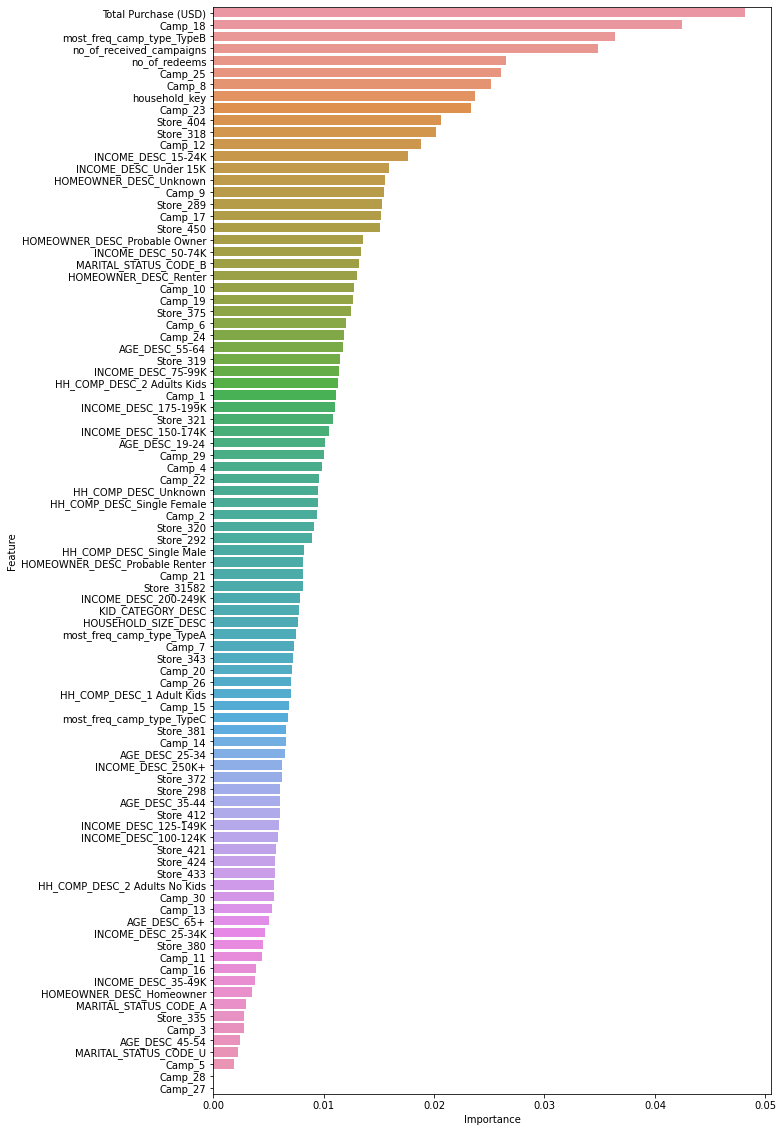

In [242]:
feat_imp = pd.DataFrame(list(zip(data.columns,mdl_best.feature_importances_)),columns=["Feature","Importance"]).sort_values(by="Importance",ascending=False)
fig_store = plt.figure(figsize=(10,20))
sns.barplot(y="Feature",x="Importance",data = feat_imp,orient="h")

#CUSTOMER SEGMENTATION 


# New section

In [243]:
df_transaction.head()


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [244]:
max_date = df_transaction['DAY'].max()
max_date = max_date + 1

In [245]:
rfm_customers = df_transaction.groupby(['household_key']).agg({
    'DAY': 'max',
    'household_key': 'count',
    'SALES_VALUE': 'sum'
})

In [246]:
rfm_customers

,DAY,household_key,SALES_VALUE
household_key,,,
1,706,1707,4330.16
2,668,712,1954.34
3,703,919,2653.21
4,627,300,1200.11
5,703,222,779.06
...,...,...,...
2496,683,1479,4339.66
2497,700,1958,7111.98
2498,710,859,2601.60


In [247]:
rfm_customers['DAY'] = max_date - rfm_customers['DAY']

In [248]:
rfm_customers

,DAY,household_key,SALES_VALUE
household_key,,,
1,6,1707,4330.16
2,44,712,1954.34
3,9,919,2653.21
4,85,300,1200.11
5,9,222,779.06
...,...,...,...
2496,29,1479,4339.66
2497,12,1958,7111.98
2498,2,859,2601.60


In [249]:
rfm_customers.rename(columns = {'DAY': 'Recency',
                                'household_key':'Frequency',
                                'SALES_VALUE':'MonetaryValue'
}, inplace = True)


In [250]:
rfm_customers

,Recency,Frequency,MonetaryValue
household_key,,,
1,6,1707,4330.16
2,44,712,1954.34
3,9,919,2653.21
4,85,300,1200.11
5,9,222,779.06
...,...,...,...
2496,29,1479,4339.66
2497,12,1958,7111.98
2498,2,859,2601.60


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

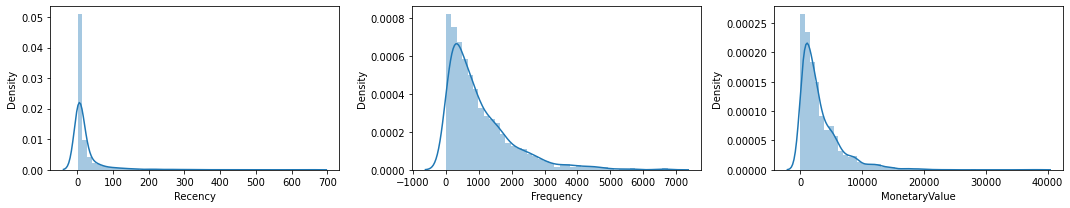

In [251]:
fig, ax = plt.subplots(1, 3, figsize=(15,3))
sns.distplot(rfm_customers['Recency'], ax=ax[0])
sns.distplot(rfm_customers['Frequency'], ax=ax[1])
sns.distplot(rfm_customers['MonetaryValue'], ax=ax[2])
plt.tight_layout()
plt.show()

In [252]:
quantiles = rfm_customers.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,MonetaryValue
0.25,2.0,320.75,970.74
0.50,7.0,728.00,2157.75
0.75,21.0,1443.00,4413.32


In [253]:
##  RFM Segmentation ----
RFM_Segment = rfm_customers.copy()
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
RFM_Segment['R_Quartile'] = RFM_Segment['Recency'].apply(R_Class, args=('Recency',quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['Frequency'].apply(FM_Class, args=('Frequency',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['MonetaryValue'].apply(FM_Class, args=('MonetaryValue',quantiles,))
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

In [254]:
RFM_Segment

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFMClass
household_key,,,,,,,
1,6,1707,4330.16,3,4,3,343
2,44,712,1954.34,1,2,2,122
3,9,919,2653.21,2,3,3,233
4,85,300,1200.11,1,1,2,112
5,9,222,779.06,2,1,1,211
...,...,...,...,...,...,...,...
2496,29,1479,4339.66,1,4,3,143
2497,12,1958,7111.98,2,4,4,244
2498,2,859,2601.60,4,3,3,433


Now lets identify the number of unique segments

In [255]:
RFM_count_unique = RFM_Segment.groupby('RFMClass')['RFMClass'].nunique()
print(RFM_count_unique.sum())

42


Calculating the sum of the RFM values instead of the mean as the sum is much easier to segment

In [256]:
RFM_Segment['RFM_Score'] = RFM_Segment[['R_Quartile','F_Quartile','M_Quartile']].sum(axis=1)
print(RFM_Segment['RFM_Score'].head())

household_key
1    10
2     5
3     8
4     4
5     4
Name: RFM_Score, dtype: int64


# Segmentation Using the RFM Scores

In [257]:
def customer_segment(df):
    if (df['RFMClass'] >= 442 or (df['RFM_Score'] >= 9)) :
        return 'Best Customers - Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 7) and (df['M_Quartile'] == 4)):
        return 'Champions Spenders'
    elif ((df['RFM_Score'] >= 6) and (df['F_Quartile'] >= 2) and (df['R_Quartile'] >=2)):
        return 'Loyal Customers'
    elif ((df['RFMClass'] >= 221) or (df['RFM_Score'] >= 6)):
        return 'Potential Loyalists'
    elif (((df['RFMClass'] >= 121) and (df['R_Quartile'] == 1)) or df['RFM_Score'] == 5):
        return 'Needs Attention'
    elif ((df['RFM_Score'] >= 4) and (df['R_Quartile'] == 1)):
        return 'Hibernating - Almost Lost'
    else:
        return 'Lost Customers'
    
    

**Can't Loose Them** 
The customers who have been recent, frequent and have spend a decent amount in the retail store

**Champions Spenders**
The customers who have spend a huge amount of money and have a decent Frequency and Recency score

**Loyal Customers**
The customers who has an averge score in all the three parameters such as Frequency, Recency and Monetary Value

**Potential Loyalists**
The customers who might not have spend much on the retailer but but have an averge recency and frequency score

**Needs Attention**
The customers who have an average frequency score but their recency score has been pretty low

**Almost Lost**
Almost Lost are the customers who might have either a decent frequency score but their recency score is poor

**Lost Customers**
The customers who have a poor recency, frequency and Monetary Value score are the lost customers and there is no point in investing to trying to get them back

In [258]:
RFM_Segment['RFMClass'] = RFM_Segment.RFMClass.apply(lambda x: int(x))
RFM_Segment['Customer Segment'] = RFM_Segment.apply(customer_segment, axis=1)

In [259]:
RFM_Segment

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFM_Score,Customer Segment
household_key,,,,,,,,,
1,6,1707,4330.16,3,4,3,343,10,Best Customers - Can't Loose Them
2,44,712,1954.34,1,2,2,122,5,Needs Attention
3,9,919,2653.21,2,3,3,233,8,Loyal Customers
4,85,300,1200.11,1,1,2,112,4,Hibernating - Almost Lost
5,9,222,779.06,2,1,1,211,4,Lost Customers
...,...,...,...,...,...,...,...,...,...
2496,29,1479,4339.66,1,4,3,143,8,Potential Loyalists
2497,12,1958,7111.98,2,4,4,244,10,Best Customers - Can't Loose Them
2498,2,859,2601.60,4,3,3,433,10,Best Customers - Can't Loose Them


In [260]:
rfm_seg_agg = RFM_Segment.groupby('Customer Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count'],
}).round(2)
# Print the aggregated dataset
print(rfm_seg_agg)

                                  Recency Frequency MonetaryValue      
                                     mean      mean          mean count
Customer Segment                                                       
Best Customers - Can't Loose Them    5.09   1884.62       5977.12  1014
Champions Spenders                  69.80   1193.50       5317.15    10
Hibernating - Almost Lost           57.60    267.70       1150.59    20
Lost Customers                      88.39    142.00        430.18   436
Loyal Customers                      8.86    654.53       1904.17   595
Needs Attention                     60.19    457.48       1395.57   156
Potential Loyalists                 23.16    467.65       1420.84   269


In [261]:
rfm_level_ag = pd.DataFrame(rfm_seg_agg)
rfm_level_ag = rfm_level_ag.reset_index()
rfm_level_ag

Customer Segment Recency Frequency MonetaryValue      
                                        mean      mean          mean count
0  Best Customers - Can't Loose Them    5.09   1884.62       5977.12  1014
1                 Champions Spenders   69.80   1193.50       5317.15    10
2          Hibernating - Almost Lost   57.60    267.70       1150.59    20
3                     Lost Customers   88.39    142.00        430.18   436
4                    Loyal Customers    8.86    654.53       1904.17   595
5                    Needs Attention   60.19    457.48       1395.57   156
6                Potential Loyalists   23.16    467.65       1420.84   269

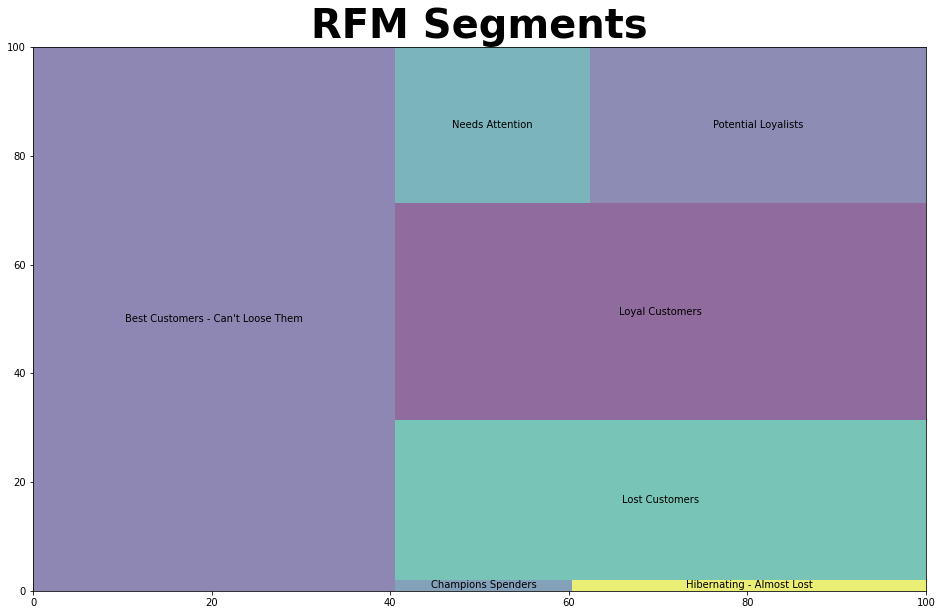

In [262]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
squarify.plot(sizes=rfm_level_ag['MonetaryValue', 'count'], 
              label=rfm_level_ag['Customer Segment'], alpha=.6 )
plt.title("RFM Segments",fontsize=40,fontweight="bold")
plt.axis('on')
plt.show()

#K-Means Clustering

In [263]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(rfm_customers[x], ax=ax[0,0])
    sns.distplot(np.log(rfm_customers[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(rfm_customers[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(rfm_customers[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
#     print(rfm_customers[x].skew().round(2))
#     print(np.log(rfm_customers[x]).skew().round(2))
#     print(np.sqrt(rfm_customers[x]).skew().round(2))
#     print(pd.Series(stats.boxcox(rfm_customers[x])[0]).skew().round(2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

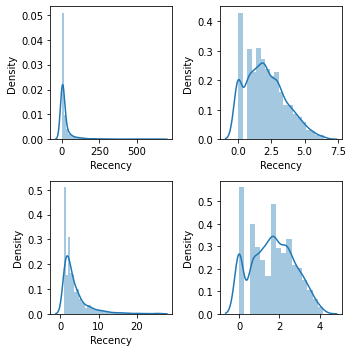

In [264]:
analyze_skewness('Recency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

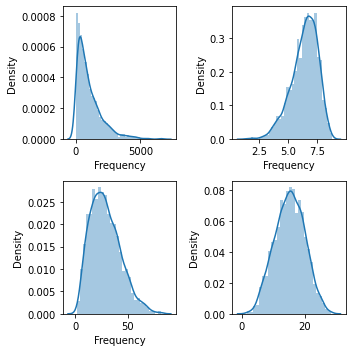

In [265]:
analyze_skewness('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

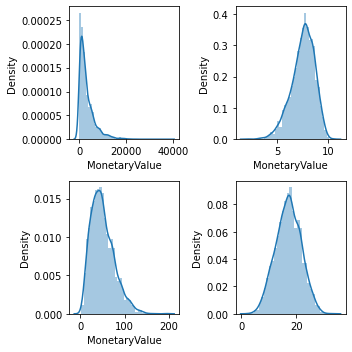

In [266]:
analyze_skewness('MonetaryValue')

Based on that visualization, it shows that the variables with box-cox transformation shows a more symmetrical form rather than the other transformations.


In [267]:
# Set the Numbers
customers = pd.DataFrame()
customers["Recency"] =  stats.boxcox(rfm_customers['Recency'])[0]
customers["Frequency"] = stats.boxcox(rfm_customers['Frequency'])[0]
customers["MonetaryValue"] = stats.boxcox(rfm_customers['MonetaryValue'])[0]
customers.tail()

,Recency,Frequency,MonetaryValue
2495,2.655713,18.801066,20.389250
2496,2.081483,20.334226,22.893565
2497,0.658990,16.097024,18.029454
2498,1.014459,17.546175,19.227412
2499,1.254118,18.836751,21.548732


In [268]:
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(customers)
customers_normalized = scaler.transform(customers) #rfm_customers
# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(customers_normalized.std(axis = 0).round(2)) # [1. 1. 1.]

[-0. -0.  0.]
[1. 1. 1.]


In [269]:
print(customers_normalized)

[[-0.08603188  0.91435621  0.69752541]
 [ 1.16122155 -0.00207692 -0.08046974]
 [ 0.19822682  0.24676679  0.20480499]
 ...
 [-0.94710993  0.17951675  0.18597735]
 [-0.61300874  0.4859386   0.44683795]
 [-0.38775551  0.75882978  0.95231594]]


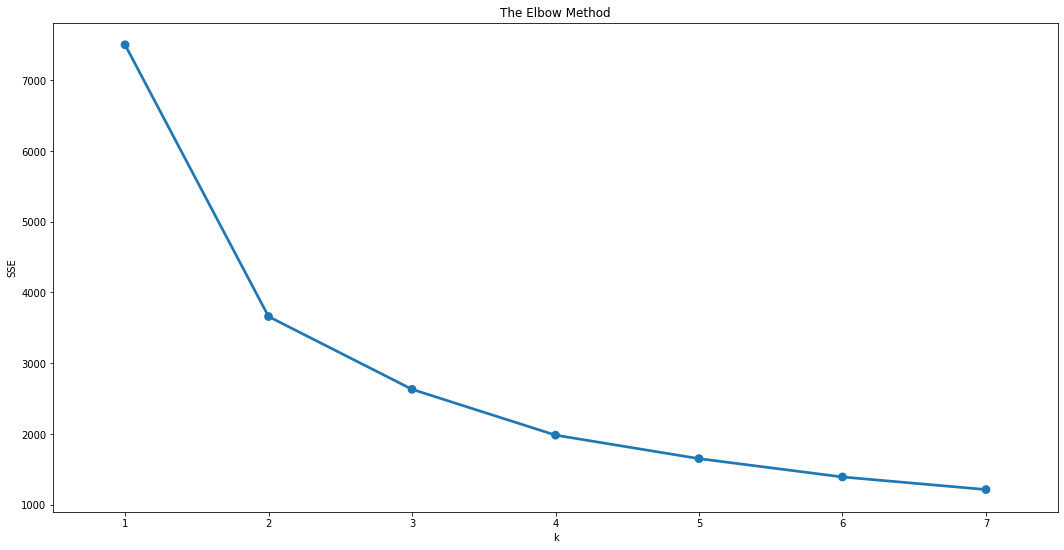

In [270]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.figure(figsize=(18,9))

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()


In [271]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(2500,)

In [272]:
customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          2.26     15.77         17.67   729
1          0.83     20.80         22.56   686
2          2.82      9.16         11.28   547
3          0.76     13.65         15.64   538

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


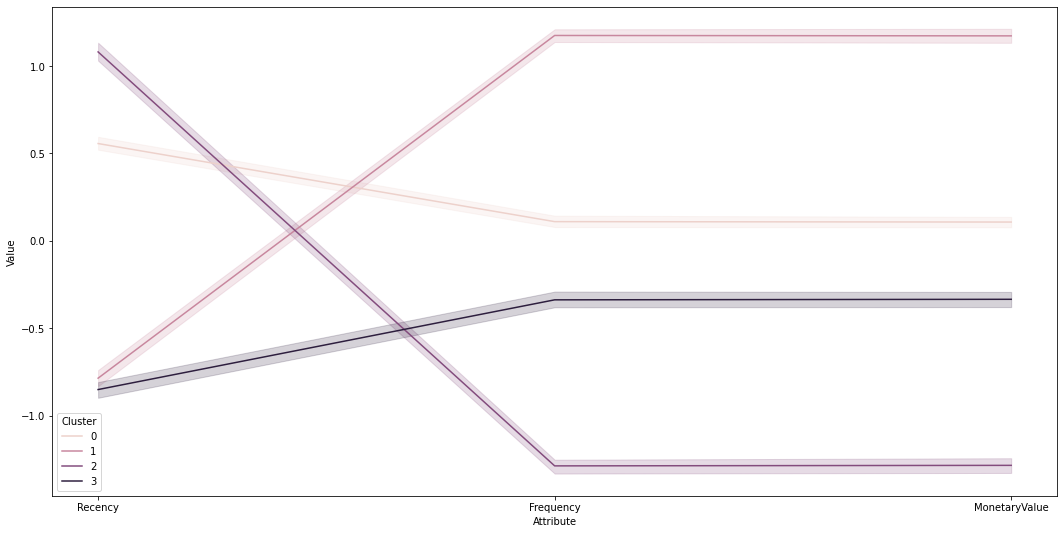

In [273]:
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
plt.figure(figsize = (18,9))
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)

In [274]:
cluster_avg = customers.groupby(['Cluster']).mean()
population_avg = customers.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(1)

,Cluster,Frequency,MonetaryValue,Recency
Cluster,,,,
0,NaN,0.0,0.0,0.4
1,NaN,0.4,0.3,-0.5
2,NaN,-0.4,-0.3,0.7
3,NaN,-0.1,-0.1,-0.5


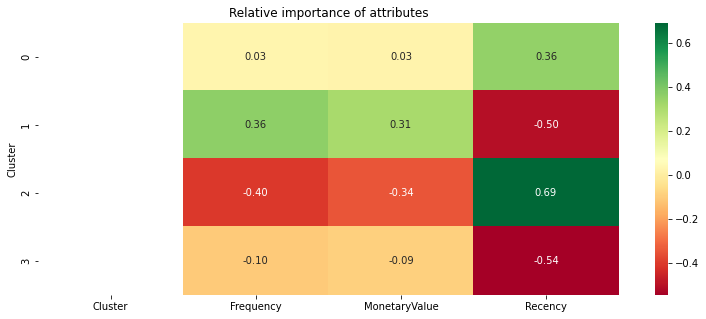

In [275]:
plt.figure(figsize=(13, 5))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


## Cluster 0
This has lowest frequency mean and low Monetary Value mean but lowest Recency mean. This segment of customers are lost

## Cluster 1 

This has the lowest frequency and pretty lowest Monetary Value mean but the recency mean is really high. This segment of customers might have just started purchasing in the retailer and the business can invest market low prices to make them more interested

## Cluster 2
This cluster have an average Frequency and average Monetary Value but a high recency mean. We need to keep them engaged to make them buy more products

## Cluster 3
This cluster of customers have good Frequency mean, good Monetary Value mean and poor Recency mean. We need to do something to not lose them as they were interested in the business until a few months ago


#CUSTOMER LIFETIME VALUE AND CHURN RATE





**Churn rate Calculation**

Repeat Rate = Number of Customer who have ordered in last 3 months / Total Number of Customers


Churn Rate = 1 - Repeat Rate


**Customer Lifetime Value Calculation**


Average Order Value = Total Revenue / Total Number of Orders


Purchase Frequency = Total Number of Orders / Total Number of Customers


CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.


Customer Value = Average Order Value * Purchase Frequency

In [276]:
df_transaction.head(50000)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
50369,1784,27620421590,54,867214,1,2.50,404,-0.49,1616,8,0.0,0.0
50370,1784,27620421590,54,1046707,1,1.89,404,0.00,1616,8,0.0,0.0
50371,1479,27620425039,54,839094,1,0.88,410,-0.71,733,8,0.0,0.0
50372,1479,27620425039,54,904575,1,1.25,410,-0.74,733,8,0.0,0.0


In [277]:
df_transaction.dtypes

household_key          int64
BASKET_ID              int64
DAY                    int64
PRODUCT_ID             int64
QUANTITY               int64
SALES_VALUE          float64
STORE_ID               int64
RETAIL_DISC          float64
TRANS_TIME             int64
WEEK_NO                int64
COUPON_DISC          float64
COUPON_MATCH_DISC    float64
dtype: object

In [278]:
df_transaction['DAY'].max()

711

In [279]:

len(set(df_transaction.DAY))


711

In [280]:
df1 = df_transaction[df_transaction.DAY < 366] 
df2 = df_transaction[df_transaction.DAY > 365] 
df2['DAY'] = df2['DAY'] - 365
df1['Date'] = pd.to_datetime(df1['DAY'], format='%j').dt.strftime('%m-%d-%y')
df1['Date'] = pd.to_datetime(df1.Date) + pd.offsets.DateOffset(years=18)
df2['Date'] = pd.to_datetime(df2['DAY'], format='%j').dt.strftime('%m-%d-%y')
df2['Date'] = pd.to_datetime(df2.Date) + pd.offsets.DateOffset(years=19)
transaction_df = pd.concat([df1,df2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [281]:
# transaction_df.to_csv('temp.csv')

In [282]:
transaction_df['month_yr'] = transaction_df['Date'].apply(lambda x: x.strftime('%b-%Y'))

In [283]:
transaction_df.columns

Index(['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'Date', 'month_yr'],
      dtype='object')

In [284]:
transaction_data=transaction_df[['household_key','Date','BASKET_ID','QUANTITY','SALES_VALUE']]

In [285]:
transaction_df_group=transaction_data.groupby('household_key').agg({'Date': lambda date: (date.max() - date.min()).days,
                                        'BASKET_ID': lambda num: len(num),
                                        'QUANTITY': lambda quant: quant.sum(),
                                        'SALES_VALUE': lambda price: price.sum()})

In [286]:
transaction_df_group

,Date,BASKET_ID,QUANTITY,SALES_VALUE
household_key,,,,
1,655,1707,1994,4330.16
2,565,712,833,1954.34
3,590,919,8538,2653.21
4,523,300,382,1200.11
5,618,222,245,779.06
...,...,...,...,...
2496,566,1479,130304,4339.66
2497,622,1958,61236,7111.98
2498,605,859,31339,2601.60


In [287]:
# Change the name of columns
transaction_df_group.columns=['num_days','num_transactions','num_units','spent_money']
transaction_df_group.head()

,num_days,num_transactions,num_units,spent_money
household_key,,,,
1,655,1707,1994,4330.16
2,565,712,833,1954.34
3,590,919,8538,2653.21
4,523,300,382,1200.11
5,618,222,245,779.06


# Calculate CLTV using following formula:

 **CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.**

 **Customer Value = Average Order Value * Purchase Frequency**

## 1. Calculate Average Order Value

In [288]:
# Average Order Value
transaction_df_group['avg_order_value']=transaction_df_group['spent_money']/transaction_df_group['num_transactions']

In [289]:
transaction_df_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value
household_key,,,,,
1,655,1707,1994,4330.16,2.536708
2,565,712,833,1954.34,2.744860
3,590,919,8538,2653.21,2.887062
4,523,300,382,1200.11,4.000367
5,618,222,245,779.06,3.509279


## 2. Calculate Purchase Frequency

In [290]:
purchase_frequency=sum(transaction_df_group['num_transactions'])/transaction_df_group.shape[0]

## 3. Calculate Repeat Rate and Churn Rate

In [291]:
# Repeat Rate
repeat_rate=transaction_df_group[transaction_df_group.num_transactions > 74].shape[0]/transaction_df_group.shape[0]

In [292]:
transaction_df_group[transaction_df_group.num_transactions > 75].shape[0]

2366

In [293]:
repeat_rate

0.9464

In [294]:
#Churn Rate
churn_rate=1-repeat_rate

In [295]:
#Churn Rate
churn_rate=1-repeat_rate

In [296]:
purchase_frequency,repeat_rate,churn_rate

(1030.726, 0.9464, 0.05359999999999998)

In [297]:
transaction_df_group

,num_days,num_transactions,num_units,spent_money,avg_order_value
household_key,,,,,
1,655,1707,1994,4330.16,2.536708
2,565,712,833,1954.34,2.744860
3,590,919,8538,2653.21,2.887062
4,523,300,382,1200.11,4.000367
5,618,222,245,779.06,3.509279
...,...,...,...,...,...
2496,566,1479,130304,4339.66,2.934185
2497,622,1958,61236,7111.98,3.632268
2498,605,859,31339,2601.60,3.028638


In [298]:
transaction_df_group.to_csv("transaction_df_group.csv")

## 4. Calculate Profit Margin

Profit margin is the commonly used profitability ratio. It represents how much percentage of total sales has earned as the gain. Let's assume our business has approx 5% profit on the total sale.


In [299]:
# Profit Margin
transaction_df_group['profit_margin']=transaction_df_group['spent_money']*0.05

In [300]:
transaction_df_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin
household_key,,,,,,
1,655,1707,1994,4330.16,2.536708,216.5080
2,565,712,833,1954.34,2.744860,97.7170
3,590,919,8538,2653.21,2.887062,132.6605
4,523,300,382,1200.11,4.000367,60.0055
5,618,222,245,779.06,3.509279,38.9530


In [301]:
## 5. Calculate Customer Lifetime Value 

In [302]:
# Customer Value
transaction_df_group['CLV']=(transaction_df_group['avg_order_value']*purchase_frequency)/churn_rate

In [303]:
#Customer Lifetime Value
transaction_df_group['cust_lifetime_value']=transaction_df_group['CLV']*transaction_df_group['profit_margin']

In [304]:
transaction_df_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV,cust_lifetime_value
household_key,,,,,,,,
1,655,1707,1994,4330.16,2.536708,216.5080,48780.793923,1.056143e+07
2,565,712,833,1954.34,2.744860,97.7170,52783.546737,5.157850e+06
3,590,919,8538,2653.21,2.887062,132.6605,55518.094994,7.365058e+06
4,523,300,382,1200.11,4.000367,60.0055,76926.901733,4.616037e+06
5,618,222,245,779.06,3.509279,38.9530,67483.309597,2.628677e+06


# Prediction Model for CLTV

In [305]:
transaction_data

,household_key,Date,BASKET_ID,QUANTITY,SALES_VALUE
0,2375,2018-01-01,26984851472,1,1.39
1,2375,2018-01-01,26984851472,1,0.82
2,2375,2018-01-01,26984851472,1,0.99
3,2375,2018-01-01,26984851472,1,1.21
4,2375,2018-01-01,26984851472,1,1.50
...,...,...,...,...,...
2595727,1598,2019-12-12,42305362535,1,0.99
2595728,1598,2019-12-12,42305362535,1,8.89
2595729,1598,2019-12-12,42305362535,1,6.99
2595730,1598,2019-12-12,42305362535,1,4.50


In [306]:
transaction_data['month_yr'] = transaction_data['Date'].apply(lambda x: x.strftime('%b-%Y'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [307]:
transaction_df.month_yr.unique()

array(['Jan-2018', 'Feb-2018', 'Mar-2018', 'Apr-2018', 'May-2018',
       'Jun-2018', 'Jul-2018', 'Aug-2018', 'Sep-2018', 'Oct-2018',
       'Nov-2018', 'Dec-2018', 'Jan-2019', 'Feb-2019', 'Mar-2019',
       'Apr-2019', 'May-2019', 'Jun-2019', 'Jul-2019', 'Aug-2019',
       'Sep-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019'], dtype=object)

In [308]:
sale=transaction_df.pivot_table(index=['household_key'],columns=['month_yr'],values='SALES_VALUE',aggfunc='sum',fill_value=0).reset_index()

In [309]:
sale

month_yr,household_key,Apr-2018,Apr-2019,Aug-2018,Aug-2019,Dec-2018,Dec-2019,Feb-2018,Feb-2019,Jan-2018,...,Mar-2018,Mar-2019,May-2018,May-2019,Nov-2018,Nov-2019,Oct-2018,Oct-2019,Sep-2018,Sep-2019
0,1,167.19,174.80,190.20,246.98,283.83,81.29,78.66,260.22,0.0,...,68.00,256.99,271.10,217.38,151.42,288.96,263.01,200.12,153.27,174.02
1,2,70.77,244.86,55.18,143.89,110.07,0.00,0.00,62.19,0.0,...,0.00,10.59,107.01,77.41,57.38,0.00,23.41,130.89,174.06,186.80
2,3,46.81,114.56,324.94,0.00,124.71,36.38,0.00,131.47,0.0,...,0.00,56.57,235.20,20.01,286.26,22.53,35.39,39.32,337.05,0.00
3,4,126.24,14.48,88.76,42.19,52.18,0.00,0.00,30.02,0.0,...,0.00,0.00,123.78,23.50,44.61,0.00,125.45,0.00,200.78,99.74
4,5,118.53,44.99,25.37,13.25,0.00,12.99,0.00,32.92,0.0,...,23.70,54.64,14.91,0.00,44.88,16.98,11.29,0.00,30.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,110.25,405.20,152.33,240.65,68.02,0.00,0.00,369.32,0.0,...,0.00,187.96,99.34,147.77,173.49,234.37,312.59,10.00,95.34,332.56
2496,2497,312.48,523.94,462.02,271.50,353.74,28.47,0.00,51.88,0.0,...,135.37,372.49,279.07,527.96,457.52,208.84,213.18,690.05,382.43,311.06
2497,2498,39.89,296.26,5.38,272.99,147.31,49.17,0.00,152.46,0.0,...,0.00,297.62,3.49,32.72,358.87,41.04,243.08,113.96,65.83,49.32
2498,2499,184.74,42.51,68.18,27.19,13.78,290.30,0.00,24.78,0.0,...,234.57,214.91,71.68,366.70,13.05,229.38,270.06,71.64,76.00,237.70


Let's sum all the months sales.

In [310]:
sale['CLV']=sale.iloc[:,2:].sum(axis=1)

In [311]:
sale

month_yr,household_key,Apr-2018,Apr-2019,Aug-2018,Aug-2019,Dec-2018,Dec-2019,Feb-2018,Feb-2019,Jan-2018,...,Mar-2019,May-2018,May-2019,Nov-2018,Nov-2019,Oct-2018,Oct-2019,Sep-2018,Sep-2019,CLV
0,1,167.19,174.80,190.20,246.98,283.83,81.29,78.66,260.22,0.0,...,256.99,271.10,217.38,151.42,288.96,263.01,200.12,153.27,174.02,4162.97
1,2,70.77,244.86,55.18,143.89,110.07,0.00,0.00,62.19,0.0,...,10.59,107.01,77.41,57.38,0.00,23.41,130.89,174.06,186.80,1883.57
2,3,46.81,114.56,324.94,0.00,124.71,36.38,0.00,131.47,0.0,...,56.57,235.20,20.01,286.26,22.53,35.39,39.32,337.05,0.00,2606.40
3,4,126.24,14.48,88.76,42.19,52.18,0.00,0.00,30.02,0.0,...,0.00,123.78,23.50,44.61,0.00,125.45,0.00,200.78,99.74,1073.87
4,5,118.53,44.99,25.37,13.25,0.00,12.99,0.00,32.92,0.0,...,54.64,14.91,0.00,44.88,16.98,11.29,0.00,30.00,0.00,660.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,110.25,405.20,152.33,240.65,68.02,0.00,0.00,369.32,0.0,...,187.96,99.34,147.77,173.49,234.37,312.59,10.00,95.34,332.56,4229.41
2496,2497,312.48,523.94,462.02,271.50,353.74,28.47,0.00,51.88,0.0,...,372.49,279.07,527.96,457.52,208.84,213.18,690.05,382.43,311.06,6799.50
2497,2498,39.89,296.26,5.38,272.99,147.31,49.17,0.00,152.46,0.0,...,297.62,3.49,32.72,358.87,41.04,243.08,113.96,65.83,49.32,2561.71
2498,2499,184.74,42.51,68.18,27.19,13.78,290.30,0.00,24.78,0.0,...,214.91,71.68,366.70,13.05,229.38,270.06,71.64,76.00,237.70,3209.33


In [312]:
sale.to_csv("sale.csv")

# Selecting Feature

Here, you need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables). Select latest 6 month as independent variable.

In [313]:
sale.columns

Index(['household_key', 'Apr-2018', 'Apr-2019', 'Aug-2018', 'Aug-2019',
       'Dec-2018', 'Dec-2019', 'Feb-2018', 'Feb-2019', 'Jan-2018', 'Jan-2019',
       'Jul-2018', 'Jul-2019', 'Jun-2018', 'Jun-2019', 'Mar-2018', 'Mar-2019',
       'May-2018', 'May-2019', 'Nov-2018', 'Nov-2019', 'Oct-2018', 'Oct-2019',
       'Sep-2018', 'Sep-2019', 'CLV'],
      dtype='object', name='month_yr')

In [314]:
X=sale[['Dec-2019','Nov-2019', 'Oct-2019','Sep-2019','Aug-2019','Jul-2019']]
y=sale[['CLV']]

In [315]:
X.head()

month_yr,Dec-2019,Nov-2019,Oct-2019,Sep-2019,Aug-2019,Jul-2019
0,81.29,288.96,200.12,174.02,246.98,187.66
1,0.00,0.00,130.89,186.80,143.89,0.00
2,36.38,22.53,39.32,0.00,0.00,36.18
3,0.00,0.00,0.00,99.74,42.19,0.00
4,12.99,16.98,0.00,0.00,13.25,65.72


## Splitting Data


To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state as a seed value to maintain reproducibility, which means whenever you split the data will not affect the results. Also, if random_state is None, then random number generator uses np.random for selecting records randomly. It means If you don't set a seed, it is different each time.

In [316]:
#split training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

## Model Development

First, import the Linear Regression module and create a Linear Regression object. Then, fit your model on the train set using fit() function and perform prediction on the test set using predict() function.

**1. Linear Regression**

In [317]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linearreg = linreg.fit(X_train, y_train)

# make predictions on the testing set
linearreg_y_pred = linreg.predict(X_test)

In [318]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

[487.81334454]
[[1.57756611 1.88397561 2.58453395 3.5242372  2.70171276 5.33701751]]


In [319]:
import pickle as pkl
with open(r"linearreg.pkl", "rb") as input_file:
  e = pkl.load(input_file)

In [320]:
p=e.predict(np.asarray([234,234,234,234,234,234]).reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [321]:
p

array([[4608.33001602]])

# How Well Does the Model Fit the data?

In order to evaluate the overall fit of the linear model, we use the R-squared value. R-squared is the proportion of variance explained by the model. Value of R-squared lies between 0 and 1. Higher value or R-squared is considered better because it indicates the larger variance explained by the model.


In [325]:
from sklearn import metrics

# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, linearreg_y_pred))

R-Square: 0.8631608409582865


In [327]:
# calculate MAE using scikit-learn
print("MAE:",metrics.mean_absolute_error(y_test,linearreg_y_pred))

#calculate mean squared error
print("MSE",metrics.mean_squared_error(y_test, linearreg_y_pred))
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, linearreg_y_pred)))

MAE: 802.0455015749941
MSE 1408665.4897031016
RMSE: 1186.8721454744405


**2. RandomForest Regression**

In [329]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 4000, max_depth=20, min_samples_leaf = 5 ).fit(X_train, y_train)

y_pred = rf.predict(X_train)
print(f"Training RMSE: {np.sqrt(metrics.mean_squared_error(y_train, y_pred))}")

rf_y_pred = rf.predict(X_test)
print(f"Training RMSE: {np.sqrt(metrics.mean_squared_error(y_test, rf_y_pred))}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training RMSE: 1035.9881585178464
Training RMSE: 1245.676582331226


**3. XGBoost Regressor**

In [330]:
from xgboost import XGBRegressor

xgb = XGBRegressor().fit(X_train, y_train)

y_pred = xgb.predict(X_train)
print(f"Training RMSE: {np.sqrt(metrics.mean_squared_error(y_train, y_pred))}")

xgb_y_pred = xgb.predict(X_test)
print(f"Testing RMSE: {np.sqrt(metrics.mean_squared_error(y_test, xgb_y_pred))}")

[03:25:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training RMSE: 1081.354441140617
Testing RMSE: 1270.0097086006936


**3. DecisionTree Regression**

In [331]:
from sklearn.tree import DecisionTreeRegressor

In [332]:
decisiontree = DecisionTreeRegressor().fit(X_train, y_train)

In [333]:
y_pred = decisiontree.predict(X_train)
print(f"Training RMSE: {np.sqrt(metrics.mean_squared_error(y_train, y_pred))}")

dt_y_pred = decisiontree.predict(X_test)
print(f"Testing RMSE: {np.sqrt(metrics.mean_squared_error(y_test, dt_y_pred))}")

Training RMSE: 179.94114415745068
Testing RMSE: 1876.7092539314194


In [334]:
import pickle as pl

In [335]:
pl_filename = "linearreg.pkl"
with open(pl_filename, 'wb') as file:
    pl.dump(linearreg, file)

In [336]:
import streamlit as st

ModuleNotFoundError: ignored

In [337]:
def predict(month1, month2,month3,month4,month5):
  with open(r"linearreg.pkl", "rb") as input_file:
    e = pickle.load(input_file)
    input = [month1,month2,month3,month4,month5]
    input=np.asarray(input)
    p=e.predict(input.reshape(1,-1))
  return p


In [338]:
np.mean(sale['CLV'])

3095.814392000006

In [339]:
def load_homepage():
	st.title('Dunnhumby - The Complete Journey')
	st.subheader('Introduction')
	st.subheader('Goals')
	st.markdown('**Household Segmentation using RFM modeling**')
	st.markdown('Segregating 2500 households based on their transactional history over the two years, to understand the plan to maximize profit.')
	st.markdown('**Predictive Analytics for Customer Lifetime value**')
	st.markdown('Devising a ML based model to predict whether the customer will repeat purchasing or not using customer lifetime value')
	#st.image('Images/goal.jpg',width = 800, height = 1000)

def load_conclusions():
	st.header('Dunnhumby : Improving Retailers through Data Science')
	#st.image('Images/conc.jpg', width = 800, height = 1000)

def load_CustomerSegmentation():
	st.header("Customer Segmentation")
	st.markdown('Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately.')
	st.markdown('Segmentation allows marketers to better tailor their marketing efforts to various audience subsets. Those efforts can relate to both communications and product development.')
	st.markdown('Customer segmentation requires a company to gather specific information – data – about customers and analyze it to identify patterns that can be used to create segments.')
	#imageSegment = Image.open('Images/Segmentation.png')
	st.image('Images/Segmentation.png', width = 800, height = 1000)
	st.header("Segmentation using RFM scores")
	st.markdown("Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors:")
	st.markdown("* Recency: How recently a customer has made a purchase")
	st.markdown("* Frequency: How often a customer makes a purchase")
	st.markdown("* Monetary Value: How much money a customer spends on purchases")
	st.markdown("RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5")
	#imageRFM = Image.open('Images/RFMModel.jpg')
	st.image('Images/RFMModel.jpg', width = 800, height = 1000)
	st.markdown("In order to implement RFM Model, we first needed to calculate the recency value, frequency value and the monetary value of every household")
	st.markdown("After calculating the appropriate values, in order to assign the RFM score we split the dataset into 4 quantiles. The most desirable values get a score of 4 and it reduces as we go down")
	st.markdown("Since the lesser score of recency value is desirable, the 1st quantile get a score of 4 whereas when it comes to frequency and monetary value, larger the value, larger is the score")
	st.markdown("After assigning the scores, we concatenate it to get the RFM score")
	st.markdown("Based on the RFM Score and the individual Recency, Frequency and Monetary Value scores, we segment the customers")
	st.markdown("The map of the segmented customers is depicted below:")
	#imageRFMResult = Image.open('Images/RFM_Result.png')
	st.image('Images/RFM_Result.jpg', width = 800, height = 1000)
	st.markdown("The definition of every customer segment is described below")
	st.markdown("* Best Customers -Can't Loose Them : The customers who have been recent, frequent and have spend a decent amount in the retail store")
	st.markdown("* Champions Spenders : The customers who have spend a huge amount of money and have a decent Frequency and Recency score")
	st.markdown("* Loyal Customers : The customers who has an averge score in all the three parameters such as Frequency, Recency and Monetary Value")
	st.markdown("* Potential Loyalists : The customers who might not have spend much on the retailer but but have an averge recency and frequency score")
	st.markdown("* Needs Attention : The customers who have an average frequency score but their recency score has been pretty low")
	st.markdown("* Almost Lost : Almost Lost are the customers who might have either a decent frequency score but their recency score is poor")
	st.markdown("* Lost Customers : The customers who have a poor recency, frequency and Monetary Value score are the lost customers and there is no point in investing to trying to get them back")

	st.header("Segmentation using K means clustering and RFM scores")
	st.markdown("K means clustering is one of the most popular clustering algorithms and usually the first thing practitioners apply when solving clustering tasks to get an idea of the structure of the dataset. The goal of K means is to group data points into distinct non-overlapping subgroups. One of the major application of K means clustering is segmentation of customers to get a better understanding of them which in turn could be used to increase the revenue of the company.")
	st.markdown("We first analyse the skewness of every attribute and decide on which transformation is to be applied.  From top left clockwise on each variable shows the plot without transformation, log transformation, square root transformation, and box-cox transformation. ")
	#imageRecency = Image.open('Images/Recency.png')
	st.image('Images/Recency.jpg', width = 800, height = 1000)
	#imageFrequency = Image.open('Images/Frequency.png')
	st.image('Images/Frequency.jpg', width = 800, height = 1000)
	#imageMV = Image.open('Images/MV.png')
	st.image('Images/MV.jpg', width = 800, height = 1000)
	st.markdown("Based on that visualization, it shows that the variables with box-cox transformation shows a more symmetrical form rather than the other transformations")
	st.markdown("To normalize, we can use StandardScaler object from scikit-learn library to do it")
	st.markdown("To make our clustering reach its maximum performance, we have to determine which hyperparameter fits to the data. To determine which hyperparameter is the best for our model and data, we can use the elbow method to decide.")
	#imageElbow = Image.open('Images/Elbow.png')
	st.image('Images/Elbow.jpg', width = 800, height = 1000)
	st.markdown("By fitting the model, we can have clusters where each data belongs. By that, we can analyze the data.")
	st.write("we analyzed the segments using snake plot. It requires the normalized dataset and also the cluster labels. By using this plot, we can have a good visualization from the data on how the cluster differs from each other. The Snake Plot looks like this")
	#imageSnake = Image.open('Images/Snake.png')
	st.image('Images/Snake.jpg', width = 800, height = 1000)
	st.write("We calculated the relative importance of each attribute and plotted below")
	#imageCorr = Image.open('Images/Corr.png')
	st.image('Images/Corr.jpg', width = 800, height = 1000)
	st.markdown("To Conclude about every cluster")
	st.markdown("* Cluster 0")
	st.markdown("This has lowest frequency mean and low Monetary Value mean but lowest Recency mean. This segment of customers are lost")
	st.markdown("* Cluster 1")
	st.markdown("This has the lowest frequency and pretty lowest Monetary Value mean but the recency mean is really high. This segment of customers might have just started purchasing in the retailer and the business can invest market low prices to make them more interested")
	st.markdown("* Cluster 2")
	st.markdown("This cluster have an average Frequency and average Monetary Value but a high recency mean. We need to keep them engaged to make them buy more products")
	st.markdown("* Cluster 3")
	st.markdown("This cluster of customers have good Frequency mean, good Monetary Value mean and poor Recency mean. We need to do something to not lose them as they were interested in the business until a few months ago")


def load_predictiveAnalytics():
  try:
    while report=='Predicting CLV of customers':
      i=i+1
      if i==1:
        st.subheader('Predicting Score')
        month1 = st.text_input('Enter purchase from 1st month')
        month2 = st.text_input('Enter purchase from 2nd month')
        month3= st.text_input('Enter purchase from 3rd month')
        month4 = st.text_input('Enter purchase from 4th month')
        month5 = st.text_input('Enter purchase from 5th month')
      if st.button('Predict'):
        try:
          month1 =float(month1)
          month2 =float(month2)
          month3 =float(month3)
          month4 =float(month4)
          month5 =float(month5)
          r=predict(month1,month2,month3,month4,month5)
          print("Customer Lifetime Value is: ", r)
					#if r[0]>0:
						#st.markdown('**Coupon Redemption**')
						#st.image('Images/wrong.jpg', width = 300, height = 1000)
					#if r[0]==1:
						#st.markdown('**Coupon Redemption**')
						#st.image('Images/yes.png', width = 300, height = 1000)
        except ValueError:
          st.markdown('**Invalid Type of Input**')
  except:
    pass			

In [340]:
def create_layout():
  app_mode = st.sidebar.selectbox("Please select a page", ["Predictive Analysis"])

  if app_mode == "Predictive Analysis":
    load_predictiveAnalytics()



In [ ]:
create_layout()